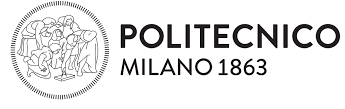

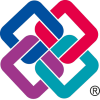


##### PhD Candidate Jacopo Cassandro

# IFC cost estimation of a structural model

The goal of the project is to create a dynamic query of the model based on user input to create a list of IfcElement from which to subsequently extract quantities; at this point the unit cost/items to be associated and from which to extract the unit cost value will be identified. Finally, the cost estimation item (IfcCostItem) will be created to create a new IFC model with cost data in it. In this way it will be also possible to realize an estimate of the costs (IfcCostSchedule).
We will proceed by questioning the model for the identification of the class to be analyzed; then identify which of these contains certain specifications and add it to a list of objects with those characteristics.
n parallel, cost entities will be created within the IFC datamodel (IfcCostItem) for the definition of the unit price.
Once the list is created, we will extract the quantities associated with these objects and we will associate the relative unit price for the definition of a new object with a price; after that, the cost items will be collected together in a cost schedule and a new model will be save.

Work steps:

1. Import IfcOpenShell library;
2. Open IFC file of the geometric model;
3. Print total of IfcElement and IfcSIUnit;
4. Select the IfcElement of interest from the previous list and create new lists based on the names of the IFC classes;
5. Now divide the elements in the lists based on the PredefinedType of each class;
6. Create priced geometric element:
    1. Search for the cost item from the price database and extract the associated unit cost value;
    2. Create a new cost entity in the geometric IFC model, associating it with the quantity of the geometric object and the cost value of the unit price item;
    3. Create a relationship between the new cost item and the geometric object;
7. Define IfcCostSchedule
8. Write the new IFC file with priced elements.


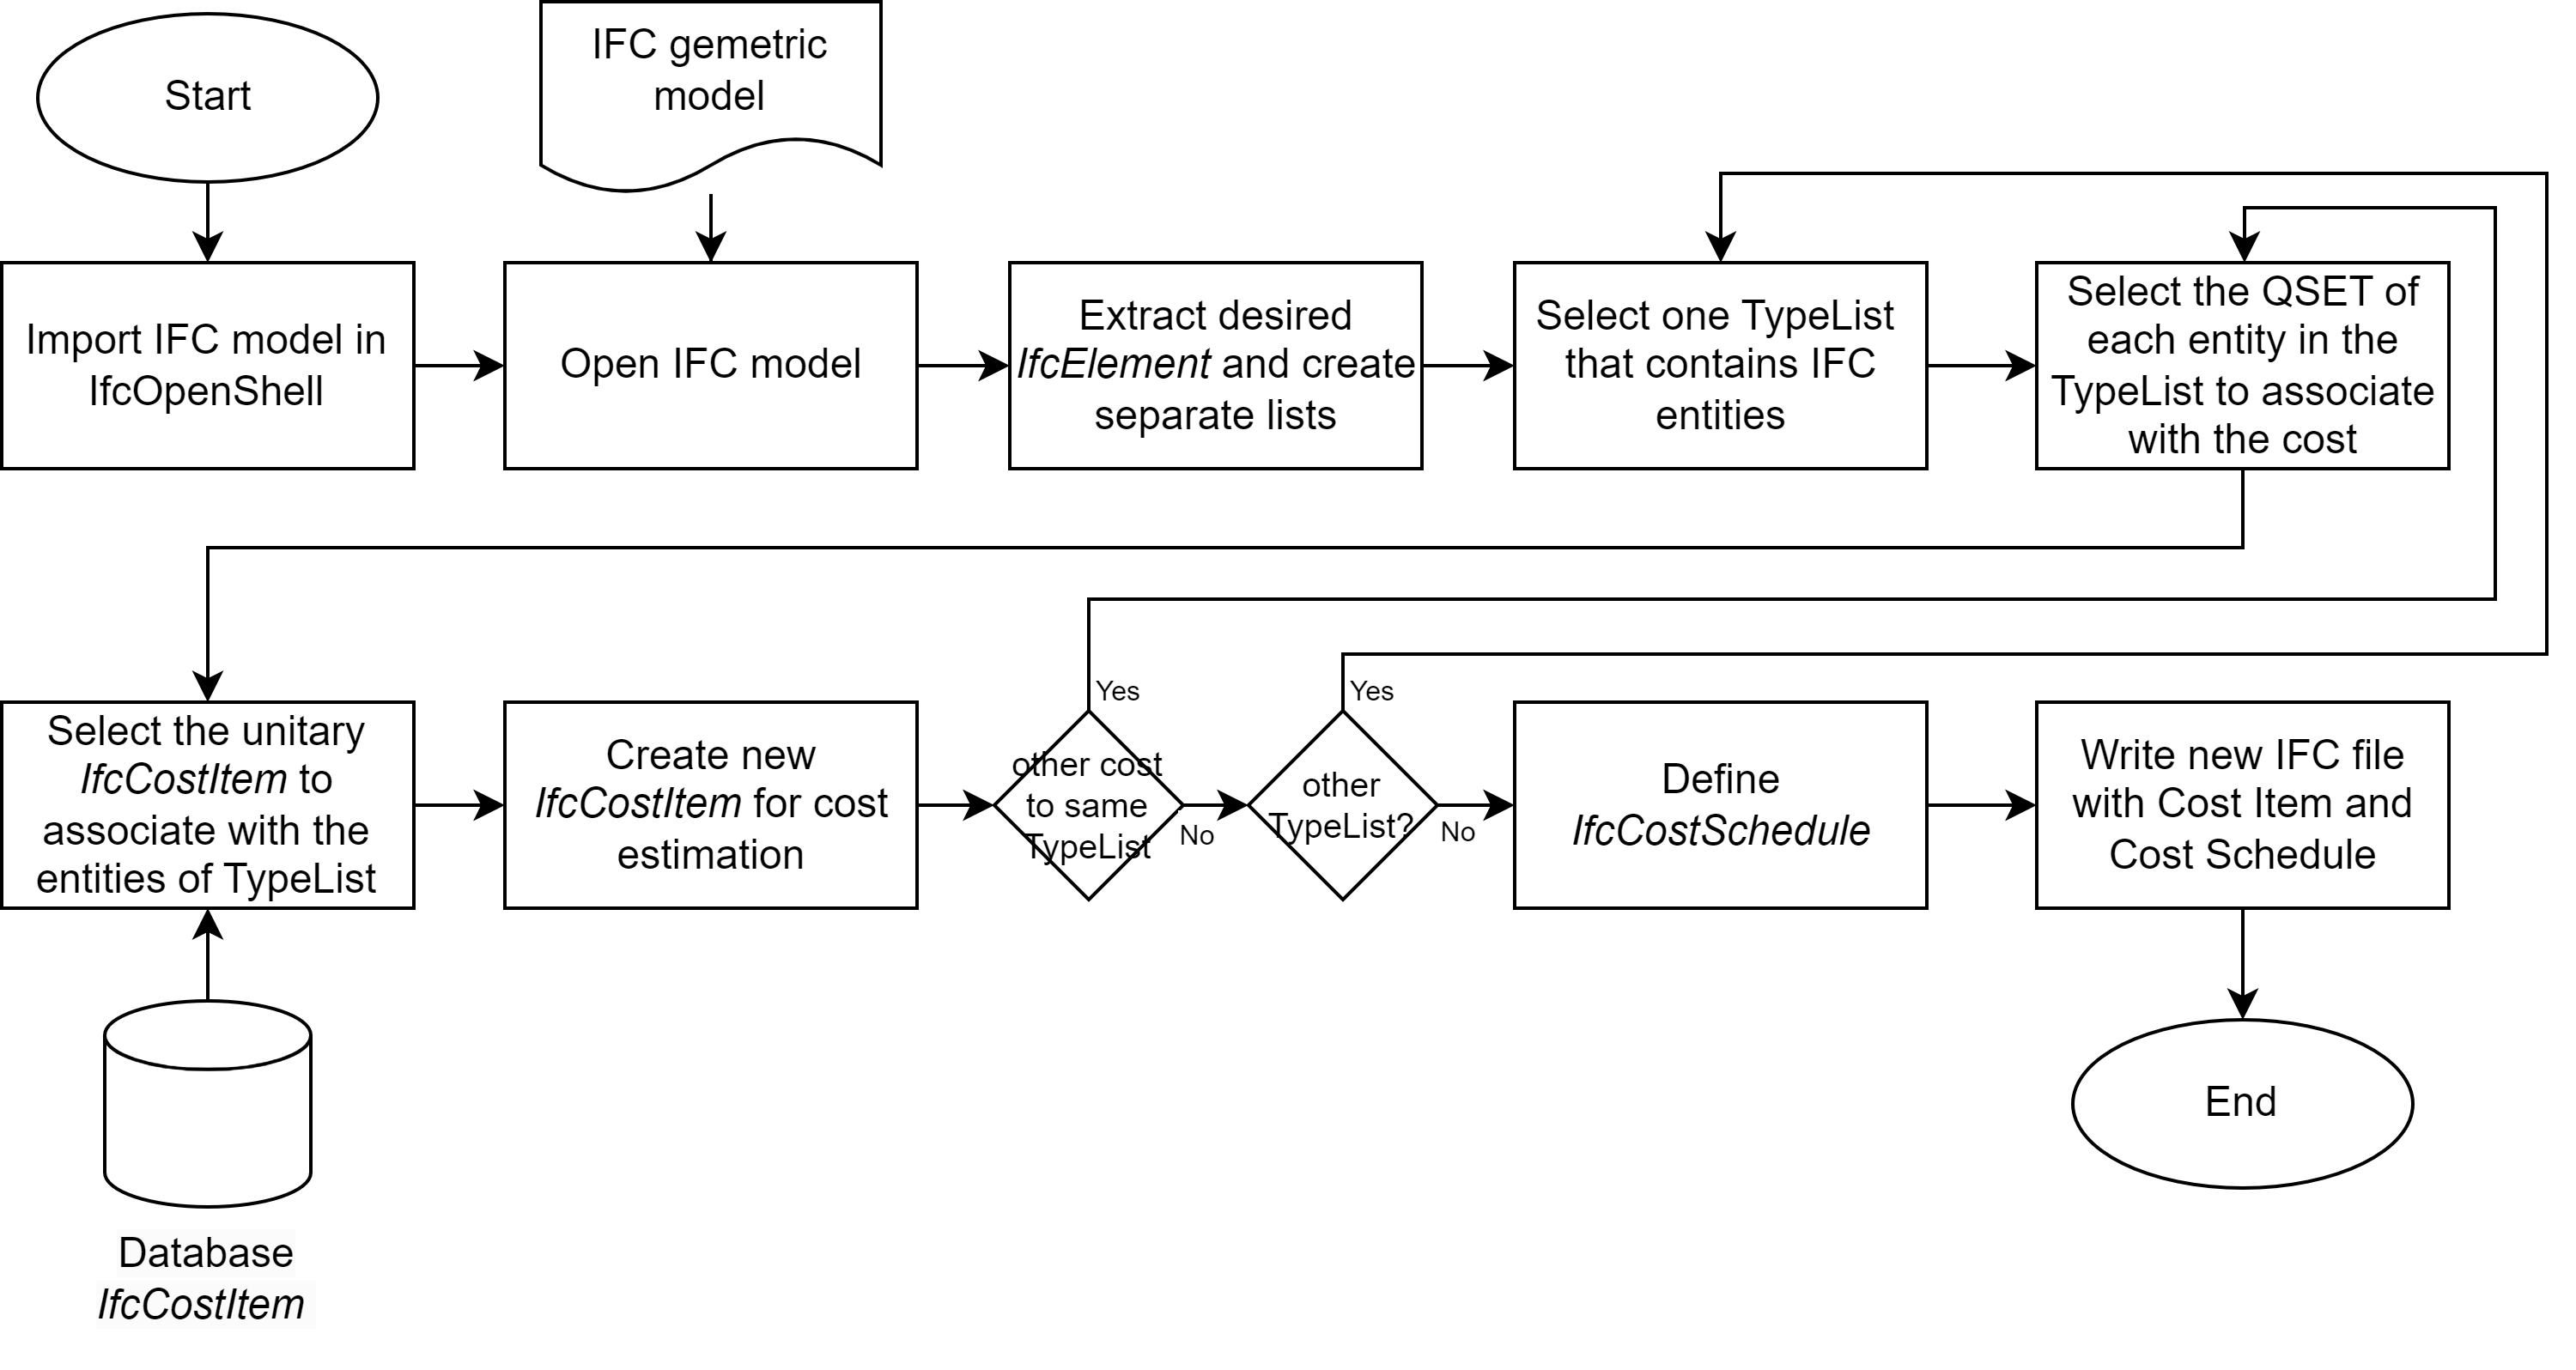

1. Import all needed python libraries

In [1]:
# importo file ifc
import ifcopenshell
import ifcopenshell.util
import ifcopenshell.util.element

File Name

In [2]:
name_output = "20240127_TestCME"

2. Open the geometric pattern to add price items to

In [3]:
#percorso modello geometrico
# ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/STR_PSC_Uffici_2022_IFC4.ifc")

ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/00-01_Articoli - Jacopo Cassandro/Modelli/01_STR palazzina uffici/STR_PSC_Uffici_2022_003.ifc")

print("\.done")

\.done


In [4]:
ifc_version = ifcmodel.schema

print(ifc_version)

IFC4


3. Print the total number of unique entity and create a set of all entities in the IFC model

In [5]:
#CREO LISTA DI TUTTE LE CLASSI PRESENTI NEL MODELLO

class_names = set()  # Use a set to store unique class names

# # Iterate over all objects in the model
# for product in ifcmodel:
#     class_name = product.is_a(IfcElement)  # Get the class name of each object
#     class_names.add(class_name)  # Add the class name to the set

# Iterate over all element in the model
for product in ifcmodel.by_type("IfcElement"):
    class_name = product.is_a()  # Get the class name of each object
    class_names.add(class_name)  # Add the class name to the set

# Print the number of unique class names
print("Number of unique class names:", len(class_names))

# Print the list of class names
print(class_names)

#print("Unique class names:")
#for class_name in class_names:
#    print(class_name)


Number of unique class names: 4
{'IfcColumn', 'IfcSlab', 'IfcWall', 'IfcBeam'}


3.1 Print the total number of uniwue entity IfcSIUnit

In [6]:
#trova tutte le IfcSIUnit già a modello
# Lista per memorizzare gli oggetti IfcSIUnit
ifc_si_units = []

# Itera su tutti gli oggetti nel modello
for obj in ifcmodel:
    if obj.is_a() == "IfcSIUnit":
        # Assegna l'oggetto a una variabile
        current_ifc_si_unit = obj
        
        # Aggiungi l'oggetto alla lista
        ifc_si_units.append(current_ifc_si_unit)

# Ora puoi accedere alle proprietà di ciascun oggetto IfcSIUnit
for i, ifc_si_unit in enumerate(ifc_si_units):
    print(f"Proprietà dell'oggetto {i}:")

    # Accesso alle proprietà specifiche di IfcSIUnit
    unit_name = ifc_si_unit.Name if hasattr(ifc_si_unit, "Name") else None
    unit_type = ifc_si_unit.UnitType if hasattr(ifc_si_unit, "UnitType") else None
    unit_prefix = ifc_si_unit.Prefix if hasattr(ifc_si_unit, "Prefix") else None

    # Stampa le proprietà
    print(f"Name: {unit_name}")
    print(f"UnitType: {unit_type}")
    print(f"Prefix: {unit_prefix}")
    print(f"Entity: {ifc_si_unit}")
    print("="*20)

#     if unit_name == "SQUARE_METRE" and unit_type == "AREAUNIT":
#         area_unit = ifc_si_unit
#         print("Area Unit esiste:")
#         print(area_unit)
#         # Puoi fare ulteriori operazioni con area_unit qui
#         break  # Esci dal ciclo se hai trovato l'Area Unit
# else:
#     print("Area Unit non esiste. Scrivi a.")


Proprietà dell'oggetto 0:
Name: PASCAL
UnitType: PRESSUREUNIT
Prefix: None
Entity: #75=IfcSIUnit(*,.PRESSUREUNIT.,$,.PASCAL.)
Proprietà dell'oggetto 1:
Name: CANDELA
UnitType: LUMINOUSINTENSITYUNIT
Prefix: None
Entity: #58=IfcSIUnit(*,.LUMINOUSINTENSITYUNIT.,$,.CANDELA.)
Proprietà dell'oggetto 2:
Name: LUMEN
UnitType: LUMINOUSFLUXUNIT
Prefix: None
Entity: #57=IfcSIUnit(*,.LUMINOUSFLUXUNIT.,$,.LUMEN.)
Proprietà dell'oggetto 3:
Name: LUX
UnitType: ILLUMINANCEUNIT
Prefix: None
Entity: #56=IfcSIUnit(*,.ILLUMINANCEUNIT.,$,.LUX.)
Proprietà dell'oggetto 4:
Name: NEWTON
UnitType: FORCEUNIT
Prefix: KILO
Entity: #55=IfcSIUnit(*,.FORCEUNIT.,.KILO.,.NEWTON.)
Proprietà dell'oggetto 5:
Name: WATT
UnitType: POWERUNIT
Prefix: None
Entity: #54=IfcSIUnit(*,.POWERUNIT.,$,.WATT.)
Proprietà dell'oggetto 6:
Name: VOLT
UnitType: ELECTRICVOLTAGEUNIT
Prefix: None
Entity: #53=IfcSIUnit(*,.ELECTRICVOLTAGEUNIT.,$,.VOLT.)
Proprietà dell'oggetto 7:
Name: AMPERE
UnitType: ELECTRICCURRENTUNIT
Prefix: None
Entity: #52

4. Extraction of the classes to which price items will be associated. Through user input I identify IFC classes and create lists based on entity names (example I find all the ifcslab entities inside the model and create a list called ifcslab that contains them all) and then collect all the different lists within a single dictionary. Specifically in this code I get the number of how many entities are present within the various lists created

In [7]:
# ESTRAGGO LE CLASSI DESIDERATE E CREO DELLE LISTE SEPARATE
class_lists = {}  # Utilizziamo un dizionario per memorizzare le liste delle istanze per ogni classe
type_lists = {}   # Utilizziamo un dizionario per memorizzare le liste delle istanze per ogni tipo

# Memorizzare le istanze per ogni classe e tipo
for product in ifcmodel.by_type("IfcElement"):
    class_name = product.is_a()

    if class_name not in class_lists:
        class_lists[class_name] = []

    class_lists[class_name].append(product)

    # Verifica se l'oggetto ha un tipo definito
    if product.ObjectType:
        type_name = product.ObjectType
        if type_name not in type_lists:
            type_lists[type_name] = []

        type_lists[type_name].append(product)

# Stampa le istanze per ogni classe con il nome della classe in grassetto
print("Istanze per ogni classe:")
for class_name, instances_list in class_lists.items():
    print("\033[1m" + f"{class_name}:" + "\033[0m" + f" {len(instances_list)} istanze")
#     for instance in instances_list:
#         print(f"  - {instance}")

# Stampa le istanze per ogni classe con il nome della classe in grassetto
print()
print("Istanze per ogni classe:")
for type_name, instances_list in type_lists.items():
    print("\033[1m" + f"{type_name}:" + "\033[0m" + f" {len(instances_list)} istanze")
#     for instance in instances_list:
#         print(f"  - {instance}")

Istanze per ogni classe:
IfcColumn: 45 istanze
IfcSlab: 7 istanze
IfcBeam: 3 istanze
IfcWall: 27 istanze

Istanze per ogni classe:
Pil_BS:BS: 11 istanze
Pil_AS:AS: 13 istanze
Pil_CD:CD: 6 istanze
Pavimento:Piastra in c.a. Sp = 25 cm: 3 istanze
Pil_BD:BD: 4 istanze
Pil_AD:AD: 4 istanze
Platea:Platea 450 mm: 2 istanze
Pil_CC:CC: 3 istanze
Platea:Magrone 100 mm: 2 istanze
Calcestruzzo-Trave rettangolare:250 x 400 mm: 3 istanze
Muro di base:Cordolo Sp = 15 cm: 8 istanze
Muro di base:Setto Sp = 20 cm: 11 istanze
Pil_CS:CS: 4 istanze
Muro di base:Setto Sp = 25 cm: 4 istanze
Muro di base:Setto Sp = 50 cm: 4 istanze


5. Print the lists just defined going to identify individual entities. Entities are divided by class (ifcwall, ifcslab, ...) and then by PredefinedType (BASESLAB, FLOOR, SOLIDWALL, ...). Thus, a dictionary of PredefineType is also created

In [8]:
# STAMPA LISTA DI IFCSLAB, SOTTOLISTA DI PREDEFINED TYPE E STAMPA LE ENTITà ASSOCIATE A QUESTE

predefined_type_lists = {}  # Utilizziamo un dizionario per memorizzare le liste dei predefined type

for class_name, class_list in class_lists.items():
    if class_list:
        # Creazione del dizionario per le liste dei PredefinedType
        predefined_type_lists[class_name] = {}

        # Estrai i valori PredefinedType e ObjectType presenti in ogni entità della lista
        for entity in class_list:
            predefined_type = entity.PredefinedType
            object_type = entity.ObjectType

            # Verifica se il PredefinedType è già presente nel dizionario
            if predefined_type:
                if predefined_type not in predefined_type_lists[class_name]:
                    predefined_type_lists[class_name][predefined_type] = {}  # Creazione del dizionario per ObjectType

                # Verifica se l'ObjectType è già presente nel dizionario
                if object_type:
                    if object_type not in predefined_type_lists[class_name][predefined_type]:
                        predefined_type_lists[class_name][predefined_type][object_type] = []  # Creazione della lista per le entità

                    # Aggiungi l'entità alla sottolista corrispondente al ObjectType
                    entity_list = predefined_type_lists[class_name][predefined_type][object_type]
                    entity_list.append(entity)

# Stampa le sottoliste con le entità complete divise per nome
if predefined_type_lists:
    print("Sublists based on entity names:")
    for class_name, predefined_type_dict in predefined_type_lists.items():
        print("Class:", class_name)
        for predefined_type, object_type_dict in predefined_type_dict.items():
            print("  PredefinedType:", predefined_type)
            for object_type, entity_list in object_type_dict.items():
                print("    ObjectType:", object_type)
                for entity in entity_list:
                    print("      -", entity)
                print()  # Aggiunge una riga vuota tra le sottoliste degli ObjectType
else:
    print("No PredefinedType lists found.")


Sublists based on entity names:
Class: IfcColumn
  PredefinedType: COLUMN
    ObjectType: Pil_BS:BS
      - #172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)
      - #246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254',$,'Pil_BS:BS',#245,#242,'410254',.COLUMN.)
      - #281=IfcColumn('2oyqcE5HDEEAteQ3V$B32p',#20,'Pil_BS:BS:410528',$,'Pil_BS:BS',#280,#277,'410528',.COLUMN.)
      - #1123=IfcColumn('3g3ncVxb165uNKqefOGVOo',#20,'Pil_BS:BS:435570',$,'Pil_BS:BS',#1122,#1119,'435570',.COLUMN.)
      - #1620=IfcColumn('0EUogq6EnFRAcvycYIPBIc',#20,'Pil_BS:BS:447753',$,'Pil_BS:BS',#1619,#1616,'447753',.COLUMN.)
      - #1690=IfcColumn('0EUogq6EnFRAcvycYIPBIY',#20,'Pil_BS:BS:447757',$,'Pil_BS:BS',#1689,#1686,'447757',.COLUMN.)
      - #1725=IfcColumn('0EUogq6EnFRAcvycYIPBIW',#20,'Pil_BS:BS:447759',$,'Pil_BS:BS',#1724,#1721,'447759',.COLUMN.)
      - #2075=IfcColumn('0EUogq6EnFRAcvycYIPBIC',#20,'Pil_BS:BS:447779',$,'Pil_BS:BS',#207

6. Analyze the individual entities stored within specific lists and specifically analyze the Pset containing the Single Value "loadbearing" to verify if the entities analyzed are actually structural elements or not.
Through a dynamic interface, I first select the relevant entity, then identify the associated QSETs to view the quantities of the object. I choose the specific quantity to include in the metric computation. Then, I access the cost database and select the unit price entry for the object under examination. I create a new cost entity within the current project, where the quantity is set to specific computation formulas based on individual quantities extracted from objects, and the cost value is extracted from the unit price. Multiple cost entities can be associated with the same geometric entity.

In [9]:
#SELEZIONO ENTITA E QSET CHE VERRA RICHIAMATO NEL COST ITEM DA COMPUTO METRICO
# Def per cordice

# Sequenze di escape ANSI per il grassetto e il colore rosso
BOLD_RED = '\033[1;31m'
COLOR_RESET = '\033[0m'

def get_property_sets(selected_entity):
    property_sets = []

    for rel in selected_entity.IsDefinedBy:
        if rel.is_a("IFCRelDefinesByProperties"):
            relating_property = rel.RelatingPropertyDefinition
            if relating_property.is_a("IFCPropertySet"):
                property_sets.append((rel, relating_property, "Property Set"))

    return property_sets

def get_quantity_sets(selected_entity):
    quantity_sets = []

    for rel in selected_entity.IsDefinedBy:
        if rel.is_a("IFCRelDefinesByProperties"):
            relating_property = rel.RelatingPropertyDefinition
            if relating_property.is_a("IFCElementQuantity"):
                quantity_sets.append((rel, relating_property, "Quantity Set"))
    return quantity_sets
                                    
def select_entity(entity_list):
    entity_choice = input("Select an Entity: ")

    if entity_choice.isdigit() and 1 <= int(entity_choice) <= len(entity_list):
        selected_entity = entity_list[int(entity_choice) - 1]
        print()
        print(f"You selected Entity: {selected_entity}")
        return selected_entity
    else:
        print("Invalid choice for Entity.")
        return None

def select_property_set(property_sets, set_name):
    selected_set = None
    for rel, set_obj, set_type in property_sets:
        if set_obj.Name == set_name:
            selected_set = set_obj
            break

    return selected_set

def crea_unit_of_measure(ifcmodel, unit_type, name, prefix):
    # Crea UNIT OF MEASURE
    unit_of_measure = ifcmodel.createIfcSIUnit()
    unit_of_measure.UnitType = unit_type
    unit_of_measure.Prefix = prefix
    unit_of_measure.Name = name

    return unit_of_measure

def trova_o_crea_unita_misura(ifc_si_units, ifc_model, unit_name, unit_type, unit_prefix):
    for ifc_si_unit in ifc_si_units:
        # Accesso alle proprietà specifiche di IfcSIUnit
        existing_name = ifc_si_unit.Name if hasattr(ifc_si_unit, "Name") else None
        existing_type = ifc_si_unit.UnitType if hasattr(ifc_si_unit, "UnitType") else None
        existing_prefix = ifc_si_unit.Prefix if hasattr(ifc_si_unit, "Prefix") else None
        
        if existing_name == unit_name and existing_type == unit_type and existing_prefix == unit_prefix:
            # Restituisci l'unità di misura esistente se trovata
            return ifc_si_unit
    
    # Se non trovi un'unità di misura esistente, creala
    new_unit = crea_unit_of_measure(ifc_model, unit_type, unit_name, unit_prefix)

    return new_unit

def crea_qto_volume(ifcmodel, unit_of_measure, name, description, volume_value, formula):
    # Crea QTO Volume
    qto_volume = ifcmodel.createIfcQuantityVolume()
    qto_volume.Name = name
    qto_volume.Description = description
    qto_volume.Unit = unit_of_measure
    qto_volume.VolumeValue = volume_value
    qto_volume.Formula = formula

    return qto_volume

def crea_qto_area(ifcmodel, unit_of_measure, name, description, area_value, formula):
    # Crea QTO Volume
    qto_area = ifcmodel.createIfcQuantityArea()
    qto_area.Name = name
    qto_area.Description = description
    qto_area.Unit = unit_of_measure
    qto_area.AreaValue = area_value
    qto_area.Formula = formula

    return qto_area

def crea_qto_weight(ifcmodel, unit_of_measure, name, description, weight_value, formula):
    # Crea QTO Volume
    qto_weight = ifcmodel.createIfcQuantityWeight()
    qto_weight.Name = name
    qto_weight.Description = description
    qto_weight.Unit = unit_of_measure
    qto_weight.WeightValue = weight_value
    qto_weight.Formula = formula

    return qto_weight

# Funzione per stampare il testo in rosso
def print_red(text):
    RED = '\033[91m'
    RESET = '\033[0m'
    print(f"{RED}{text}{RESET}")


    
    
# Menu per la scelta della lista da visualizzare
from ifcopenshell import open as ifc_open
import os

class_names = list(predefined_type_lists.keys())

structural_objects = {}
non_structural_objects = {}

while True:
    print("Classes:")
    for i, class_name in enumerate(class_names):
        print(f"{i + 1}. {class_name}")

    class_choice = input("Select a class (or 'exit' to quit): ")

    if class_choice.lower() == 'exit':
        break

    if class_choice.isdigit() and 1 <= int(class_choice) <= len(class_names):
        class_name = class_names[int(class_choice) - 1]
        print(f"You selected Class: {class_name}")

        predefined_type_dict = predefined_type_lists[class_name]
        predefined_types = list(predefined_type_dict.keys())

        if not entity_list:
            print("No predefined types found for the selected class.")
            print()
            continue
        
        print("Predefined Types:")
        for i, predefined_type in enumerate(predefined_types):
            print(f"{i + 1}. {predefined_type}")

        predefined_type_choice = input("Select a Predefined Type (or 'back' to go back): ")
       
        if predefined_type_choice.lower() == 'back':
            continue
            
        if predefined_type_choice.isdigit() and 1 <= int(predefined_type_choice) <= len(predefined_types):
            predefined_type = predefined_types[int(predefined_type_choice) - 1]
            print(f"You selected Predefined Type: {predefined_type}")
 
            object_types = list(predefined_type_dict[predefined_type].keys())

            if not object_types:
                print("No object types found for the selected Predefined Type.")
                print()
                continue
            
                      
            print("Object Type:")
            for i, object_type in enumerate(object_types):
                print(f"{i + 1}. {object_type}")

            object_type_choice = input("Select an Object Type (or 'back' to go back): ")

            if object_type_choice.lower() == 'back':
                continue
            if object_type_choice.isdigit() and 1 <= int(object_type_choice) <= len(object_types):
                selected_object_type = object_types[int(object_type_choice) - 1]
                print(f"You selected Object Type: {selected_object_type}")

                entity_list = predefined_type_dict[predefined_type][selected_object_type]

                if not entity_list:
                    print("No entities found for the selected Object Type.")
                    print()
                    continue

                print(f"Processing entities for the {selected_object_type} Object Type of Class: {class_name}")


                for i, entity in enumerate(entity_list):
                    print(f"{i + 1}. {entity}")

                    property_sets = get_property_sets(entity)

                    if not property_sets:
                        print("No Entity found.")
                        print()
                        choice = input("Continue selecting entities? (yes/no): ")
                        if choice.lower() != 'yes':
                            break
                        else:
                            continue

                    selected_sets = []

                    for rel, set_obj, set_type in property_sets:
                        if set_obj.Name in ["Pset_SlabCommon", "Pset_WallCommon", "Pset_ColumnCommon", "Pset_BeamCommon"]:
                            selected_sets.append(set_obj)

                    if selected_sets:
                        for selected_set in selected_sets:
                            #print("Selected Property Set:", selected_set.Name)

                            loadbearing_property = None

                            for property in selected_set.HasProperties:
                                if property.is_a("IfcPropertySingleValue") and property.Name == "LoadBearing":
                                    loadbearing_property = property
                                    break

                            if loadbearing_property:
                                #print("LoadBearing property found!")
                                #print("Property:", loadbearing_property)
                                if hasattr(loadbearing_property, "NominalValue"):
                                    nominal_value = loadbearing_property.NominalValue
                                    #print("NominalValue:", nominal_value)
                                    value = nominal_value.wrappedValue
                                    #print("Value:", value)

                                    if value == True:
                                        print()
                                        print(entity.is_a(), "selected is structural")
                                        print(entity)
                                        print()

                                        if class_name in structural_objects:
                                            structural_objects[class_name].append(entity)
                                        else:
                                            structural_objects[class_name] = [entity]
                                    else:
                                        print()
                                        print(entity.is_a(), "selected is non-structural")
                                        print(entity)
                                        print()

                                        if class_name in non_structural_objects:
                                            non_structural_objects[class_name].append(entity)
                                        else:
                                            non_structural_objects[class_name] = [entity]


        if class_name in structural_objects:
            # RICERCA QSET e seleziona qset interessato a cui sarà associato costo
            quantity_dict_list = []  # Lista per archiviare i dizionari dei risultati per ogni entità
            while True:
                # Itera su tutte le entità della lista
                for entity in entity_list:
                    # RICERCA QSET e seleziona qset interessato a cui sarà associato costo
                    if entity:
                        quantity_sets = get_quantity_sets(entity)

                        if quantity_sets:
                            selected_rel, selected_set, selected_type = quantity_sets[0]  # Selezione automatica del primo QSET
    #                                 print(f"Selected Quantity Set for {entity.Name}: {selected_set.Name} ({selected_type})")

                            if hasattr(selected_rel, 'RelatingPropertyDefinition'):
                                relating_property_definition = selected_rel.RelatingPropertyDefinition

                                if relating_property_definition.is_a("IfcElementQuantity"):
                                    if hasattr(relating_property_definition, 'Quantities'):
                                        quantities = relating_property_definition.Quantities

                                        quantity_dict = {}

                                        for i, quantity in enumerate(quantities):
                                            #print(quantity.Name)

                                            if quantity.Name == "NetVolume":
                                                volume = quantity
                                                volume_value = quantity.VolumeValue
                                                quantity_dict.update(NetVolume=volume_value)
                                            elif quantity.Name == "Depth":
                                                depth = quantity
                                                depth_value = quantity.LengthValue
                                                quantity_dict.update(Depth=depth_value)
                                            elif quantity.Name == "Perimeter":
                                                perimeter = quantity
                                                perimeter_value = quantity.LengthValue
                                                quantity_dict.update(Perimeter=perimeter_value)
                                            elif quantity.Name == "Length":
                                                length = quantity
                                                length_value = quantity.LengthValue
                                                quantity_dict.update(Length=length_value)
                                            elif quantity.Name == "Width":
                                                width = quantity
                                                width_value = quantity.LengthValue
                                                quantity_dict.update(Width=width_value)
                                            elif quantity.Name == "GrossArea":
                                                area = quantity
                                                area_value = quantity.AreaValue
                                                quantity_dict.update(GrossArea=area_value)
                                            elif quantity.Name == "OuterSurfaceArea":
                                                outher_surface_area = quantity
                                                outher_surface_area_value = quantity.AreaValue
                                                quantity_dict.update(OuterSurfaceArea=outher_surface_area_value)
                                            elif quantity.Name == "Height":
                                                height = quantity
                                                height_value = quantity.LengthValue
                                                quantity_dict.update(Height=height_value)
                                            

                                        print(quantity_dict)
                                        quantity_dict_list.append(quantity_dict)

                # Alla fine del ciclo, hai una lista di dizionari, uno per ogni entità
    #                     print("\nSummary of Quantity Data:")
    #                     for i, quantity_dict in enumerate(quantity_dict_list, 1):
    #                         print(f"{i}. {quantity_dict}")
    

            
                # Dichiarazione di una lista per memorizzare le nuove quantità
                new_quantities_list = []

                # Itera su tutte le entità presenti in quantity_dict_list
                
                for quantity_dict in quantity_dict_list:
                    # Estrai le informazioni necessarie dal dizionario quantity_dict
                    #entity = quantity_dict.get("entity")
                    volume_value = quantity_dict.get("NetVolume", None)
                    depth_value = quantity_dict.get("Depth", None)
                    perimeter_value = quantity_dict.get("Perimeter", None)
                    length_value = quantity_dict.get("Length", None)
                    width_value = quantity_dict.get("Width", None)
                    area_value = quantity_dict.get("GrossArea", None)
                    outher_surface_area_value = quantity_dict.get("OuterSurfaceArea", None)
                    height_value = quantity_dict.get("Height", None)

                    # Adattare in base ai nomi delle quantità effettive e aggiungi tutte le altre

                    # Lista di tutte le quantità disponibili
                    cme_quantities = ["Volume", 
                                      "Weight Foundations", 
                                      "Weight Column", 
                                      "Weight Beam", 
                                      "Weight Wall", 
                                      "Weight Floor",
                                      "Wet Area Foundations", 
                                      "Wet Area Column", 
                                      "Wet Area Beam", 
                                      "Wet Area Wall", 
                                      "Wet Area Floor"]

                    # Chiedi all'utente di selezionare la quantità solo la prima volta
                    if not 'selected_quantity' in locals():
                        print()
                        print("Select a quantity for cost estimation:")

                        for i, quantity in enumerate(cme_quantities):
                            print(f"{i + 1}. {quantity}")

                        quantity_choice = input(f"Enter the number of the quantity to select (1-{len(cme_quantities)}): ")

                        if quantity_choice.isdigit() and 1 <= int(quantity_choice) <= len(cme_quantities):
                            quantity_index = int(quantity_choice) - 1
                            selected_quantity = cme_quantities[quantity_index]
                    
                        else:
                            print("Invalid quantity selection. Exiting.")
                            break
                        

                    print(selected_quantity)
                    # Esegui operazioni in base alla quantità selezionata
                    if selected_quantity == "Volume":
                        unit_name = "CUBIC_METRE"
                        unit_type = "VOLUMEUNIT"
                        volume_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                        try:
                            volume_value = float(volume_value * 1.1)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            volume_value = None
                        if volume_value is not None:
                            qto_cme = crea_qto_volume(ifcmodel, volume_unit, "Volume", "Volume of Concrete", volume_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                            break

                            # Aggiungi qui altre logiche per le altre quantità
                    
                    elif selected_quantity == "Weight Foundations":
                        unit_name = "GRAM"
                        unit_type = "MASSUNIT"
                        unit_prefix = "KILO"
                        weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                        try:
                            weight_value = float(180 * volume_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            weight_value = None
                        if weight_value is not None:
                            qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Foundations", "Weight of Reinforcing Bars in the foundation slab", weight_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Weight Column":
                        unit_name = "GRAM"
                        unit_type = "MASSUNIT"
                        unit_prefix = "KILO"
                        weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                        try:
                            weight_value = float(250 * volume_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            weight_value = None
                        if weight_value is not None:
                            qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Column", "Weight of Reinforcing Bars in the column", weight_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Weight Beam":
                        unit_name = "GRAM"
                        unit_type = "MASSUNIT"
                        unit_prefix = "KILO"
                        weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                        try:
                            weight_value = float(250 * volume_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            weight_value = None
                        if weight_value is not None:
                            qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Beam", "Weight of Reinforcing Bars in the beam", weight_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Weight Wall":
                        unit_name = "GRAM"
                        unit_type = "MASSUNIT"
                        unit_prefix = "KILO"
                        weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                        try:
                            weight_value = float(200 * volume_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            weight_value = None
                        if weight_value is not None:
                            qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Wall", "Weight of Reinforcing Bars in the wall", weight_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Weight Floor":
                        unit_name = "GRAM"
                        unit_type = "MASSUNIT"
                        unit_prefix = "KILO"
                        weight_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, unit_prefix)
                        try:
                            weight = float(200 * volume_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            weight = None
                        if weight is not None:
                            qto_cme = crea_qto_weight(ifcmodel, weight_unit, "Weight Foundations", "Weight of Reinforcing Bars in the foundation slab", weight_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO volume in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Wet Area Foundations":
                        unit_name = "SQUARE_METRE"
                        unit_type = "AREAUNIT"
                        area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                        try:
                            wet_area_value = float((perimeter_value * depth_value)*0.0001) #moltiplico per 0.0001 perche udm di perimetr e depth in cm2
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                        if wet_area_value is not None:
                            qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Foundations", "Wet Area of Concrete in the foundation slab", wet_area_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO perimeter or depth in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Wet Area Column":
                        unit_name = "SQUARE_METRE"
                        unit_type = "AREAUNIT"
                        area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                        try:
                            wet_area_value = float(outher_surface_area_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                        if wet_area_value is not None:
                            qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Column", "Wet Area of Concrete in the column", wet_area_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO outer surface area in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Wet Area Beam":
                        unit_name = "SQUARE_METRE"
                        unit_type = "AREAUNIT"
                        area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                        try:
                            wet_area_value = float(outher_surface_area_value)
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                        if wet_area_value is not None:
                            qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Beam", "Wet Area of Concrete in the beam", wet_area_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO outer surface area in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Wet Area Wall":
                        unit_name = "SQUARE_METRE"
                        unit_type = "AREAUNIT"
                        area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                        try:
                            wet_area_value = float((((width_value + lenght_value)*2)*height_value)*0.0001) #moltiplico per 0.0001 perche udm in cm
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                        if wet_area_value is not None:
                            qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Wall", "Wet Area of Concrete in the wall", wet_area_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO widht or lenght or height in 3D model" + COLOR_RESET)
                            break


                    elif selected_quantity == "Wet Area Floor":
                        unit_name = "SQUARE_METRE"
                        unit_type = "AREAUNIT"
                        area_unit = trova_o_crea_unita_misura(ifc_si_units, ifcmodel, unit_name, unit_type, None)
                        try:
                            wet_area_value = float(((perimeter_value * depth_value)*0.0001) + ((lenght_value * width_value)*0.0001)) #moltiplico per 0.0001 perche udm di perimetr e depth in cm2
                        except Exception as e:
                            print(f"Si è verificato un errore: {e}")
                            wet_area_value = None  # o un altro valore di default o marca per indicare che c'è stato un errore
                        if wet_area_value is not None:
                            qto_cme = crea_qto_area(ifcmodel, area_unit, "Wet Area Floor", "Wet Area of Concrete in the floor", wet_area_value, None)
                            print(qto_cme)
                            # Aggiungi la nuova quantità alla lista
                            new_quantities_list.append(qto_cme)
                        else:
                            print()
                            qto_cme = 0
                            print(BOLD_RED + f"Non esiste QTO perimeter or depth in 3D model" + COLOR_RESET)
                            break

                        print()



                    else:
                        print("Input non valido. Inserisci un numero valido.")

                    
                #break
                print (selected_quantity)
                        
                # SCELGO IFCCOST DA DATABASE PREZZI
                folder_path = "C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/COST ITEM/OC/"
                file_list = os.listdir(folder_path)
                # Filtra i file con estensione IFC
                ifc_files = [file for file in file_list if file.endswith(".ifc")]

                # Stampa il menu a tendina dei file filtrati disponibili
                print("Select a file to open:")
                for i, ifc_file in enumerate(ifc_files):
                    print(f"{i + 1}. {ifc_file}")

                # Ottieni la scelta dell'utente
                file_choice = input("Enter your choice: ")

                if file_choice.isdigit() and 1 <= int(file_choice) <= len(ifc_files):

                    # Ottieni il percorso completo del file selezionato
                    file_index = int(file_choice) - 1
                    selected_file = os.path.join(folder_path, ifc_files[file_index])

                    # Procedi con l'apertura del file selezionato
                    ifc_file = ifc_open(selected_file)

                    # Ottenere tutte le entità IfcCostItem dal file IFC
                    ifccostitems = ifc_file.by_type("IfcCostItem")
                    for ifccostitem in ifccostitems:
                        # print(ifccostitem) #stampo tutti gli IfcCostItem
                        # unitaryoccode = ifccostitem[5]
                        # print(unitaryoccode)
                        # unitaryoccost = ifccostitem
                        # print(unitaryoccost)
                        costtype = ifccostitem[4]
                        # print(costtype)

                        #cambio in construction work se cambio anche nei cost item il nome da opera compiuta a construction work
                        if "OPERA COMPIUTA" in costtype or "LAVORO PROVVISIONALE" in costtype or "PRODOTTO IN OPERA" in costtype:
                            # stampo entità cost item unitaria
                            print()
                            print(ifccostitem)
                            cost_globalid = ifccostitem.GlobalId

                            costvalues = ifccostitem[7] #ifccostitem.CostValues
                            costunits = ifccostitem[8] #ifccostitem.CostQuantities
                            for costvalue in costvalues:
                                # stampo entità valore di costo associata a entità cost item unitaria
                                print()
                                print(costvalue)
                                cost = costvalue.AppliedValue[0]  # definisco costo slab
                                print()
                                print("Unitary price of", entity.GlobalId, entity.Name + ":")
                                print("-", cost)

                                # Filtro tutti i costItem del modello
                                cost_items = ifcmodel.by_type('IfcCostItem')
                                print(cost_items)

                                if not cost_items:
                                    # Crea una nuova voce di costo IfcCostItem da computo metrico e la associo a obj geometrico

                                    # creo CostValue                                                                    
                                    costvalue_OC = ifcmodel.createIfcCostValue()

                                    # Imposta gli attributi
                                    costvalue_OC.Name = costvalue.Name
                                    costvalue_OC.Description = costvalue.Description

                                    value_OC = ifcmodel.createIfcReal(float(cost))
                                    costvalue_OC.AppliedValue = value_OC

                                    costvalue_OC.UnitBasis = None
                                    costvalue_OC.ApplicableDate = '2024-01-01'
                                    costvalue_OC.FixedUntilDate = '2024-12-31'
                                    costvalue_OC.Category = 'List Price'
                                    costvalue_OC.Condition = None
                                    costvalue_OC.ArithmeticOperator = None
                                    costvalue_OC.Components = None
                                    print()
                                    print(costvalue_OC)

                                    # creo CostItem
                                    costitem_OC = ifcmodel.createIfcCostItem()

                                    # Imposta gli attributi
                                    costitem_OC.GlobalId = ifccostitem.GlobalId
                                    costitem_OC.Name = ifccostitem.Name
                                    costitem_OC.Description = ifccostitem.Description
                                    costitem_OC.PredefinedType = ifccostitem.PredefinedType
                                    costitem_OC.ObjectType = ifccostitem.ObjectType

                                    # richiamo cost value
                                    costitem_OC.CostValues = [costvalue_OC]

                                    # richiamo cost quantity da lista quantità tipi       PENSO A POSSIBILE IMPLEMMNTZIONE DI REGOLE DA PARTE UTENTE
                                    costitem_OC.CostQuantities = new_quantities_list
                                    print()
                                    print(new_quantities_list)
                                    print()
                                    print(costitem_OC)

                                    # REL ASSIGN #
                                    name = "Rel between " + entity.is_a() + " and " + costitem_OC.Name
                                    print()
                                    print("Name Rel:", name)
                                    description = "Rel between " + entity.is_a() + " and " + costitem_OC.Name
                                    print("Description Rel:", description)


                                    relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, entity_list, None, costitem_OC)
                                    print(relass_to)
                                    print()
                                    print(entity_list)

                                    #da implementare nei costi unitari poi togli commenti

    #                                         for costunit in costunits:
    #                                             # stampo entità unità di misura associata a entità cost item unitaria di getto cls per fondazioni
    #                                             print()
    #                                             print(costunit)
    #                                             unit = costunit[2]  # definisco costo slab
    #                                             print("Unit of measurement", entity.Name + ":")
    #                                             print("-", unit)
    #                                             print("-", unit.UnitType)
    #                                             print("-", unit.Prefix)
    #                                             print("-", unit.Name)
                                        
                                    break

                                else:
                                    # Cerca il cost_item con il GlobalId desiderato
                                    found_cost_item = None
                                    for cost_item in cost_items:
                                        if cost_globalid == cost_item.GlobalId:
                                            found_cost_item = cost_item
                                            break

                                    # Verifica se il cost_item è stato trovato
                                    if found_cost_item:
                                        print(found_cost_item)
                                        # Esegui le operazioni desiderate con il found_cost_item
                                        found_cost_item.CostQuantities = tuple(list(found_cost_item.CostQuantities) + new_quantities_list)
                                        print()
                                        print(new_quantities_list)
                                        print()
                                        print(found_cost_item)

                                        # Trova le relazioni IfcRelAssignsToControl associate al costItem
                                        rel_assigns_to_control = ifcmodel.by_type('IfcRelAssignsToControl', include_subtypes=True)
                                        # Trova le relazioni IfcRelAssignsToControl associate al costItem
                                        found_rel_assign_to_control = None
                                        for rel in rel_assigns_to_control:
                                            relating_control = rel.RelatingControl
                                            if cost_globalid == relating_control.GlobalId:
                                                found_rel_assign_to_control = rel
                                                break

                                        # Verifica se la relazione è stata trovata
                                        if found_rel_assign_to_control:
                                            print(found_rel_assign_to_control)
                                            # Esegui le operazioni desiderate con la found_rel_assign_to_control
                                            rel_globalid = found_rel_assign_to_control.GlobalId
                                            objs_update = list(found_rel_assign_to_control.RelatedObjects)
                                            print(objs_update)
                                            for entity in entity_list:
                                                objs_update.append(entity)
                                                found_rel_assign_to_control.RelatedObjects = tuple(objs_update)
                                                print()
                                                print(found_rel_assign_to_control)
                                                print()
                                                print(entity)
                                            
                                        # Se il ciclo rel_assigns_to_control viene completato senza interruzioni, interrompi il ciclo esterno
                                        else:
                                            break


                                    else:
                                        # Crea una nuova voce di costo IfcCostItem da computo metrico e la associo a obj geometrico

                                        # creo CostValue                                                                    
                                        costvalue_OC = ifcmodel.createIfcCostValue()

                                        # Imposta gli attributi
                                        costvalue_OC.Name = costvalue.Name
                                        costvalue_OC.Description = costvalue.Description

                                        value_OC = ifcmodel.createIfcReal(float(cost))
                                        costvalue_OC.AppliedValue = value_OC

                                        costvalue_OC.UnitBasis = None
                                        costvalue_OC.ApplicableDate = '2024-01-01'
                                        costvalue_OC.FixedUntilDate = '2024-12-31'
                                        costvalue_OC.Category = 'List Price'
                                        costvalue_OC.Condition = None
                                        costvalue_OC.ArithmeticOperator = None
                                        costvalue_OC.Components = None
                                        print()
                                        print(costvalue_OC)

                                        # creo CostItem
                                        costitem_OC = ifcmodel.createIfcCostItem()

                                        # Imposta gli attributi
                                        costitem_OC.GlobalId = ifccostitem.GlobalId
                                        costitem_OC.Name = ifccostitem.Name
                                        costitem_OC.Description = ifccostitem.Description
                                        costitem_OC.PredefinedType = ifccostitem.PredefinedType
                                        costitem_OC.ObjectType = ifccostitem.ObjectType

                                        # richiamo cost value
                                        costitem_OC.CostValues = [costvalue_OC]

                                        # richiamo cost quantity da quantità selezionata dell'oggetto       PENSO A POSSIBILE IMPLEMMNTZIONE DI REGOLE DA PARTE UTENTE
                                        # Verifica se CostQuantities è None, in tal caso inizializzalo come una lista vuota
                                        if costitem_OC.CostQuantities is None:
                                            costitem_OC.CostQuantities = []

                                        # Itera sulla lista di nuove quantità e aggiungile all'attributo CostQuantities di costitem_OC
                                        for new_quantity in new_quantities_list:
                                            costitem_OC.CostQuantities = tuple(new_quantities_list)
                                            print()
                                            print(new_quantities_list)
                                            print()
                                            print(costitem_OC)
                                            break

                                        # REL ASSIGN #
                                        for entity in entity_list:
                                            name = "Rel between " + entity.Name + " and " + costitem_OC.Name
                                            print()
                                            print("Name Rel:", name)
                                            description = "Rel between " + entity.Name + " and " + costitem_OC.Name
                                            print("Description Rel:", description)


                                            relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, [entity], None, costitem_OC)
                                            print(relass_to)
                                            print()
                                            print(entity)

                                        #da implementare nei costi unitari poi togli commenti

#                                                 for costunit in costunits:
#                                                     # stampo entità unità di misura associata a entità cost item unitaria di getto cls per fondazioni
#                                                     print()
#                                                     print(costunit)
#                                                     unit = costunit[2]  # definisco costo slab
#                                                     print("Unit of measurement", entity.Name + ":")
#                                                     print("-", unit)
#                                                     print("-", unit.UnitType)
#                                                     print("-", unit.Prefix)
#                                                     print("-", unit.Name)
                                            
                                        break
                                    break
                                break
                            break
                        break
                    break
                break
            # Qui puoi aggiungere una logica per la scelta se continuare con le altre entità o interrompere
            choice = input("Add another cost item to entitiy? (yes/no): ")
            if choice.lower() == 'yes':
                # Pulisci la variabile alla fine del blocco di codice
                del selected_quantity
                continue
            if choice.lower() != 'yes':
                # Pulisci la variabile alla fine del blocco di codice
                del selected_quantity
                break


Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Pil_BS:BS
Processing entities for the Pil_BS:BS Object Type of Class: IfcColumn
1. #172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)

IfcColumn selected is structural
#172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)

2. #246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254',$,'Pil_BS:BS',#245,#242,'410254',.COLUMN.)

IfcColumn selected is structural
#246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254',$,'Pil_BS:BS',#245,#242,'410254',.COLUMN.)

3. 

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Pil_BS:BS
Processing entities for the Pil_BS:BS Object Type of Class: IfcColumn
1. #172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)

IfcColumn selected is structural
#172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)

2. #246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254',$,'Pil_BS:BS',#245,#242,'410254',.COLUMN.)

IfcColumn selected is structural
#246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254'

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Pil_BS:BS
Processing entities for the Pil_BS:BS Object Type of Class: IfcColumn
1. #172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)

IfcColumn selected is structural
#172=IfcColumn('3s7veVKhf15PTuiEPe8SMD',#20,'Pil_BS:BS:409328',$,'Pil_BS:BS',#171,#168,'409328',.COLUMN.)

2. #246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254',$,'Pil_BS:BS',#245,#242,'410254',.COLUMN.)

IfcColumn selected is structural
#246=IfcColumn('2oyqcE5HDEEAteQ3V$B36T',#20,'Pil_BS:BS:410254'

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Pil_AS:AS
Processing entities for the Pil_AS:AS Object Type of Class: IfcColumn
1. #210=IfcColumn('3s7veVKhf15PTuiEPe8Ri2',#20,'Pil_AS:AS:409727',$,'Pil_AS:AS',#209,#206,'409727',.COLUMN.)

IfcColumn selected is structural
#210=IfcColumn('3s7veVKhf15PTuiEPe8Ri2',#20,'Pil_AS:AS:409727',$,'Pil_AS:AS',#209,#206,'409727',.COLUMN.)

2. #352=IfcColumn('2oyqcE5HDEEAteQ3V$B3kC',#20,'Pil_AS:AS:411807',$,'Pil_AS:AS',#351,#348,'411807',.COLUMN.)

IfcColumn selected is structural
#352=IfcColumn('2oyqcE5HDEEAteQ3V$B3kC',#20,'Pil_AS:AS:411807'

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Pil_AS:AS
Processing entities for the Pil_AS:AS Object Type of Class: IfcColumn
1. #210=IfcColumn('3s7veVKhf15PTuiEPe8Ri2',#20,'Pil_AS:AS:409727',$,'Pil_AS:AS',#209,#206,'409727',.COLUMN.)

IfcColumn selected is structural
#210=IfcColumn('3s7veVKhf15PTuiEPe8Ri2',#20,'Pil_AS:AS:409727',$,'Pil_AS:AS',#209,#206,'409727',.COLUMN.)

2. #352=IfcColumn('2oyqcE5HDEEAteQ3V$B3kC',#20,'Pil_AS:AS:411807',$,'Pil_AS:AS',#351,#348,'411807',.COLUMN.)

IfcColumn selected is structural
#352=IfcColumn('2oyqcE5HDEEAteQ3V$B3kC',#20,'Pil_AS:AS:411807'

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Pil_AS:AS
Processing entities for the Pil_AS:AS Object Type of Class: IfcColumn
1. #210=IfcColumn('3s7veVKhf15PTuiEPe8Ri2',#20,'Pil_AS:AS:409727',$,'Pil_AS:AS',#209,#206,'409727',.COLUMN.)

IfcColumn selected is structural
#210=IfcColumn('3s7veVKhf15PTuiEPe8Ri2',#20,'Pil_AS:AS:409727',$,'Pil_AS:AS',#209,#206,'409727',.COLUMN.)

2. #352=IfcColumn('2oyqcE5HDEEAteQ3V$B3kC',#20,'Pil_AS:AS:411807',$,'Pil_AS:AS',#351,#348,'411807',.COLUMN.)

IfcColumn selected is structural
#352=IfcColumn('2oyqcE5HDEEAteQ3V$B3kC',#20,'Pil_AS:AS:411807'

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 3
You selected Object Type: Pil_CD:CD
Processing entities for the Pil_CD:CD Object Type of Class: IfcColumn
1. #316=IfcColumn('2oyqcE5HDEEAteQ3V$B3JH',#20,'Pil_CD:CD:411586',$,'Pil_CD:CD',#315,#312,'411586',.COLUMN.)

IfcColumn selected is structural
#316=IfcColumn('2oyqcE5HDEEAteQ3V$B3JH',#20,'Pil_CD:CD:411586',$,'Pil_CD:CD',#315,#312,'411586',.COLUMN.)

2. #1158=IfcColumn('3g3ncVxb165uNKqefOGVH4',#20,'Pil_CD:CD:435972',$,'Pil_CD:CD',#1157,#1154,'435972',.COLUMN.)

IfcColumn selected is structural
#1158=IfcColumn('3g3ncVxb165uNKqefOGVH4',#20,'Pil_CD:CD:435

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 3
You selected Object Type: Pil_CD:CD
Processing entities for the Pil_CD:CD Object Type of Class: IfcColumn
1. #316=IfcColumn('2oyqcE5HDEEAteQ3V$B3JH',#20,'Pil_CD:CD:411586',$,'Pil_CD:CD',#315,#312,'411586',.COLUMN.)

IfcColumn selected is structural
#316=IfcColumn('2oyqcE5HDEEAteQ3V$B3JH',#20,'Pil_CD:CD:411586',$,'Pil_CD:CD',#315,#312,'411586',.COLUMN.)

2. #1158=IfcColumn('3g3ncVxb165uNKqefOGVH4',#20,'Pil_CD:CD:435972',$,'Pil_CD:CD',#1157,#1154,'435972',.COLUMN.)

IfcColumn selected is structural
#1158=IfcColumn('3g3ncVxb165uNKqefOGVH4',#20,'Pil_CD:CD:435

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 3
You selected Object Type: Pil_CD:CD
Processing entities for the Pil_CD:CD Object Type of Class: IfcColumn
1. #316=IfcColumn('2oyqcE5HDEEAteQ3V$B3JH',#20,'Pil_CD:CD:411586',$,'Pil_CD:CD',#315,#312,'411586',.COLUMN.)

IfcColumn selected is structural
#316=IfcColumn('2oyqcE5HDEEAteQ3V$B3JH',#20,'Pil_CD:CD:411586',$,'Pil_CD:CD',#315,#312,'411586',.COLUMN.)

2. #1158=IfcColumn('3g3ncVxb165uNKqefOGVH4',#20,'Pil_CD:CD:435972',$,'Pil_CD:CD',#1157,#1154,'435972',.COLUMN.)

IfcColumn selected is structural
#1158=IfcColumn('3g3ncVxb165uNKqefOGVH4',#20,'Pil_CD:CD:435

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 4
You selected Object Type: Pil_BD:BD
Processing entities for the Pil_BD:BD Object Type of Class: IfcColumn
1. #422=IfcColumn('2oyqcE5HDEEAteQ3V$B3s$',#20,'Pil_BD:BD:413356',$,'Pil_BD:BD',#421,#418,'413356',.COLUMN.)

IfcColumn selected is structural
#422=IfcColumn('2oyqcE5HDEEAteQ3V$B3s$',#20,'Pil_BD:BD:413356',$,'Pil_BD:BD',#421,#418,'413356',.COLUMN.)

2. #1830=IfcColumn('0EUogq6EnFRAcvycYIPBIw',#20,'Pil_BD:BD:447765',$,'Pil_BD:BD',#1829,#1826,'447765',.COLUMN.)

IfcColumn selected is structural
#1830=IfcColumn('0EUogq6EnFRAcvycYIPBIw',#20,'Pil_BD:BD:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 4
You selected Object Type: Pil_BD:BD
Processing entities for the Pil_BD:BD Object Type of Class: IfcColumn
1. #422=IfcColumn('2oyqcE5HDEEAteQ3V$B3s$',#20,'Pil_BD:BD:413356',$,'Pil_BD:BD',#421,#418,'413356',.COLUMN.)

IfcColumn selected is structural
#422=IfcColumn('2oyqcE5HDEEAteQ3V$B3s$',#20,'Pil_BD:BD:413356',$,'Pil_BD:BD',#421,#418,'413356',.COLUMN.)

2. #1830=IfcColumn('0EUogq6EnFRAcvycYIPBIw',#20,'Pil_BD:BD:447765',$,'Pil_BD:BD',#1829,#1826,'447765',.COLUMN.)

IfcColumn selected is structural
#1830=IfcColumn('0EUogq6EnFRAcvycYIPBIw',#20,'Pil_BD:BD:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 4
You selected Object Type: Pil_BD:BD
Processing entities for the Pil_BD:BD Object Type of Class: IfcColumn
1. #422=IfcColumn('2oyqcE5HDEEAteQ3V$B3s$',#20,'Pil_BD:BD:413356',$,'Pil_BD:BD',#421,#418,'413356',.COLUMN.)

IfcColumn selected is structural
#422=IfcColumn('2oyqcE5HDEEAteQ3V$B3s$',#20,'Pil_BD:BD:413356',$,'Pil_BD:BD',#421,#418,'413356',.COLUMN.)

2. #1830=IfcColumn('0EUogq6EnFRAcvycYIPBIw',#20,'Pil_BD:BD:447765',$,'Pil_BD:BD',#1829,#1826,'447765',.COLUMN.)

IfcColumn selected is structural
#1830=IfcColumn('0EUogq6EnFRAcvycYIPBIw',#20,'Pil_BD:BD:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 5
You selected Object Type: Pil_AD:AD
Processing entities for the Pil_AD:AD Object Type of Class: IfcColumn
1. #458=IfcColumn('2oyqcE5HDEEAteQ3V$B3nL',#20,'Pil_AD:AD:413510',$,'Pil_AD:AD',#457,#454,'413510',.COLUMN.)

IfcColumn selected is structural
#458=IfcColumn('2oyqcE5HDEEAteQ3V$B3nL',#20,'Pil_AD:AD:413510',$,'Pil_AD:AD',#457,#454,'413510',.COLUMN.)

2. #1865=IfcColumn('0EUogq6EnFRAcvycYIPBIu',#20,'Pil_AD:AD:447767',$,'Pil_AD:AD',#1864,#1861,'447767',.COLUMN.)

IfcColumn selected is structural
#1865=IfcColumn('0EUogq6EnFRAcvycYIPBIu',#20,'Pil_AD:AD:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 5
You selected Object Type: Pil_AD:AD
Processing entities for the Pil_AD:AD Object Type of Class: IfcColumn
1. #458=IfcColumn('2oyqcE5HDEEAteQ3V$B3nL',#20,'Pil_AD:AD:413510',$,'Pil_AD:AD',#457,#454,'413510',.COLUMN.)

IfcColumn selected is structural
#458=IfcColumn('2oyqcE5HDEEAteQ3V$B3nL',#20,'Pil_AD:AD:413510',$,'Pil_AD:AD',#457,#454,'413510',.COLUMN.)

2. #1865=IfcColumn('0EUogq6EnFRAcvycYIPBIu',#20,'Pil_AD:AD:447767',$,'Pil_AD:AD',#1864,#1861,'447767',.COLUMN.)

IfcColumn selected is structural
#1865=IfcColumn('0EUogq6EnFRAcvycYIPBIu',#20,'Pil_AD:AD:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 5
You selected Object Type: Pil_AD:AD
Processing entities for the Pil_AD:AD Object Type of Class: IfcColumn
1. #458=IfcColumn('2oyqcE5HDEEAteQ3V$B3nL',#20,'Pil_AD:AD:413510',$,'Pil_AD:AD',#457,#454,'413510',.COLUMN.)

IfcColumn selected is structural
#458=IfcColumn('2oyqcE5HDEEAteQ3V$B3nL',#20,'Pil_AD:AD:413510',$,'Pil_AD:AD',#457,#454,'413510',.COLUMN.)

2. #1865=IfcColumn('0EUogq6EnFRAcvycYIPBIu',#20,'Pil_AD:AD:447767',$,'Pil_AD:AD',#1864,#1861,'447767',.COLUMN.)

IfcColumn selected is structural
#1865=IfcColumn('0EUogq6EnFRAcvycYIPBIu',#20,'Pil_AD:AD:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 6
You selected Object Type: Pil_CC:CC
Processing entities for the Pil_CC:CC Object Type of Class: IfcColumn
1. #597=IfcColumn('1VMFjRH1zBGg8s6Mq2oKnT',#20,'Pil_CC:CC:417526',$,'Pil_CC:CC',#596,#593,'417526',.COLUMN.)

IfcColumn selected is structural
#597=IfcColumn('1VMFjRH1zBGg8s6Mq2oKnT',#20,'Pil_CC:CC:417526',$,'Pil_CC:CC',#596,#593,'417526',.COLUMN.)

2. #1900=IfcColumn('0EUogq6EnFRAcvycYIPBIs',#20,'Pil_CC:CC:447769',$,'Pil_CC:CC',#1899,#1896,'447769',.COLUMN.)

IfcColumn selected is structural
#1900=IfcColumn('0EUogq6EnFRAcvycYIPBIs',#20,'Pil_CC:CC:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 6
You selected Object Type: Pil_CC:CC
Processing entities for the Pil_CC:CC Object Type of Class: IfcColumn
1. #597=IfcColumn('1VMFjRH1zBGg8s6Mq2oKnT',#20,'Pil_CC:CC:417526',$,'Pil_CC:CC',#596,#593,'417526',.COLUMN.)

IfcColumn selected is structural
#597=IfcColumn('1VMFjRH1zBGg8s6Mq2oKnT',#20,'Pil_CC:CC:417526',$,'Pil_CC:CC',#596,#593,'417526',.COLUMN.)

2. #1900=IfcColumn('0EUogq6EnFRAcvycYIPBIs',#20,'Pil_CC:CC:447769',$,'Pil_CC:CC',#1899,#1896,'447769',.COLUMN.)

IfcColumn selected is structural
#1900=IfcColumn('0EUogq6EnFRAcvycYIPBIs',#20,'Pil_CC:CC:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 6
You selected Object Type: Pil_CC:CC
Processing entities for the Pil_CC:CC Object Type of Class: IfcColumn
1. #597=IfcColumn('1VMFjRH1zBGg8s6Mq2oKnT',#20,'Pil_CC:CC:417526',$,'Pil_CC:CC',#596,#593,'417526',.COLUMN.)

IfcColumn selected is structural
#597=IfcColumn('1VMFjRH1zBGg8s6Mq2oKnT',#20,'Pil_CC:CC:417526',$,'Pil_CC:CC',#596,#593,'417526',.COLUMN.)

2. #1900=IfcColumn('0EUogq6EnFRAcvycYIPBIs',#20,'Pil_CC:CC:447769',$,'Pil_CC:CC',#1899,#1896,'447769',.COLUMN.)

IfcColumn selected is structural
#1900=IfcColumn('0EUogq6EnFRAcvycYIPBIs',#20,'Pil_CC:CC:447

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 7
You selected Object Type: Pil_CS:CS
Processing entities for the Pil_CS:CS Object Type of Class: IfcColumn
1. #982=IfcColumn('3g3ncVxb165uNKqefOGSlj',#20,'Pil_CS:CS:432301',$,'Pil_CS:CS',#981,#978,'432301',.COLUMN.)

IfcColumn selected is structural
#982=IfcColumn('3g3ncVxb165uNKqefOGSlj',#20,'Pil_CS:CS:432301',$,'Pil_CS:CS',#981,#978,'432301',.COLUMN.)

2. #1018=IfcColumn('3g3ncVxb165uNKqefOGShV',#20,'Pil_CS:CS:432543',$,'Pil_CS:CS',#1017,#1014,'432543',.COLUMN.)

IfcColumn selected is structural
#1018=IfcColumn('3g3ncVxb165uNKqefOGShV',#20,'Pil_CS:CS:432

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 7
You selected Object Type: Pil_CS:CS
Processing entities for the Pil_CS:CS Object Type of Class: IfcColumn
1. #982=IfcColumn('3g3ncVxb165uNKqefOGSlj',#20,'Pil_CS:CS:432301',$,'Pil_CS:CS',#981,#978,'432301',.COLUMN.)

IfcColumn selected is structural
#982=IfcColumn('3g3ncVxb165uNKqefOGSlj',#20,'Pil_CS:CS:432301',$,'Pil_CS:CS',#981,#978,'432301',.COLUMN.)

2. #1018=IfcColumn('3g3ncVxb165uNKqefOGShV',#20,'Pil_CS:CS:432543',$,'Pil_CS:CS',#1017,#1014,'432543',.COLUMN.)

IfcColumn selected is structural
#1018=IfcColumn('3g3ncVxb165uNKqefOGShV',#20,'Pil_CS:CS:432

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 1
You selected Class: IfcColumn
Predefined Types:
1. COLUMN
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: COLUMN
Object Type:
1. Pil_BS:BS
2. Pil_AS:AS
3. Pil_CD:CD
4. Pil_BD:BD
5. Pil_AD:AD
6. Pil_CC:CC
7. Pil_CS:CS
Select an Object Type (or 'back' to go back): 7
You selected Object Type: Pil_CS:CS
Processing entities for the Pil_CS:CS Object Type of Class: IfcColumn
1. #982=IfcColumn('3g3ncVxb165uNKqefOGSlj',#20,'Pil_CS:CS:432301',$,'Pil_CS:CS',#981,#978,'432301',.COLUMN.)

IfcColumn selected is structural
#982=IfcColumn('3g3ncVxb165uNKqefOGSlj',#20,'Pil_CS:CS:432301',$,'Pil_CS:CS',#981,#978,'432301',.COLUMN.)

2. #1018=IfcColumn('3g3ncVxb165uNKqefOGShV',#20,'Pil_CS:CS:432543',$,'Pil_CS:CS',#1017,#1014,'432543',.COLUMN.)

IfcColumn selected is structural
#1018=IfcColumn('3g3ncVxb165uNKqefOGShV',#20,'Pil_CS:CS:432

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 2
You selected Class: IfcSlab
Predefined Types:
1. FLOOR
2. BASESLAB
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: FLOOR
Object Type:
1. Pavimento:Piastra in c.a. Sp = 25 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Pavimento:Piastra in c.a. Sp = 25 cm
Processing entities for the Pavimento:Piastra in c.a. Sp = 25 cm Object Type of Class: IfcSlab
1. #387=IfcSlab('2oyqcE5HDEEAteQ3V$B3gM',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:412037',$,'Pavimento:Piastra in c.a. Sp = 25 cm',#369,#386,'412037',.FLOOR.)

IfcSlab selected is structural
#387=IfcSlab('2oyqcE5HDEEAteQ3V$B3gM',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:412037',$,'Pavimento:Piastra in c.a. Sp = 25 cm',#369,#386,'412037',.FLOOR.)

2. #494=IfcSlab('2oyqcE5HDEEAteQ3V$B3p0',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:413651',$,'Pa

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 2
You selected Class: IfcSlab
Predefined Types:
1. FLOOR
2. BASESLAB
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: FLOOR
Object Type:
1. Pavimento:Piastra in c.a. Sp = 25 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Pavimento:Piastra in c.a. Sp = 25 cm
Processing entities for the Pavimento:Piastra in c.a. Sp = 25 cm Object Type of Class: IfcSlab
1. #387=IfcSlab('2oyqcE5HDEEAteQ3V$B3gM',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:412037',$,'Pavimento:Piastra in c.a. Sp = 25 cm',#369,#386,'412037',.FLOOR.)

IfcSlab selected is structural
#387=IfcSlab('2oyqcE5HDEEAteQ3V$B3gM',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:412037',$,'Pavimento:Piastra in c.a. Sp = 25 cm',#369,#386,'412037',.FLOOR.)

2. #494=IfcSlab('2oyqcE5HDEEAteQ3V$B3p0',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:413651',$,'Pa

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 2
You selected Class: IfcSlab
Predefined Types:
1. FLOOR
2. BASESLAB
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: FLOOR
Object Type:
1. Pavimento:Piastra in c.a. Sp = 25 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Pavimento:Piastra in c.a. Sp = 25 cm
Processing entities for the Pavimento:Piastra in c.a. Sp = 25 cm Object Type of Class: IfcSlab
1. #387=IfcSlab('2oyqcE5HDEEAteQ3V$B3gM',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:412037',$,'Pavimento:Piastra in c.a. Sp = 25 cm',#369,#386,'412037',.FLOOR.)

IfcSlab selected is structural
#387=IfcSlab('2oyqcE5HDEEAteQ3V$B3gM',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:412037',$,'Pavimento:Piastra in c.a. Sp = 25 cm',#369,#386,'412037',.FLOOR.)

2. #494=IfcSlab('2oyqcE5HDEEAteQ3V$B3p0',#20,'Pavimento:Piastra in c.a. Sp = 25 cm:413651',$,'Pa

Enter the number of the quantity to select (1-11): 1
Volume
#3380=IfcQuantityVolume('Volume','Volume of Concrete',#24,130.662031499999,$)
Volume
#3381=IfcQuantityVolume('Volume','Volume of Concrete',#24,3.09251250000001,$)
Volume
Select a file to open:
1. 'LP.EEA.a04.A1020.Qa000.0000.-'_cassaforma.ifc
2. 'LP.EEA.a04.A1020.Qa000.0015.-'_cassaforma.ifc
3. 'LP.EEA.a04.A1020.Qa000.0020.-'_cassaforma.ifc
4. 'LP.EEA.a04.A1020.Qa000.0030.-'_cassaforma.ifc
5. 'LP.EEA.a04.A1020.Qa000.0035.-'_cassaforma.ifc
6. 'LP.EEA.a04.A1020.Qa000.0040.-'_cassaforma.ifc
7. 'OC.EEA.a02.E9700.Sb017.0255.-'_armatura.ifc
8. 'OC.EEA.a10.A6415.J0001.0035.-'_sottofondazione.ifc
9. 'OC.EEA.a10.C0102.J0001.0005.b'_strato di muratura.ifc
10. 'OC.EEA.a10.E0000.J0001.0045.c'_struttura.ifc
11. 'OC.EEA.a10.E5100.J0001.0000.b'_fondazione.ifc
Enter your choice: 11

#3=IfcCostItem('1jtCrStonD$Q0HoFle2MGb',$,'fondazione','OPERA: Fondazione di conglomerato cementizio; resistenza a compressione [classe] = C25/30 | classe di espo

Enter your choice: 7

#3=IfcCostItem('0QzpwQbRj8N96DNaJXaaY6',$,'armatura','OPERA: Armatura, barre nervate di lega ferrosa acciaio B450C; impiego: strutture in cemento armato. Incluso: sormonti; sfrido; legature.
LAVORO: Posa.
SPECIFICHE TECNICHE: -','OPERA COMPIUTA','LOM241.OC.EEA.a02.E9700.Sb017.0255.-',.USERDEFINED.,(#2),$)

#2=IfcCostValue('Cost of armatura','Cost of armatura',IfcReal(1.71),$,$,$,$,$,$,$)

Unitary price of 3DODGrvxD0aeVlByE54qlJ Platea:Platea 450 mm:444675:
- 1.71
[#3217=IfcCostItem('1HbcFrKiD7fvnTZSMW2wIv',$,'struttura','OPERA: Struttura di conglomerato cementizio; impiego: pilastri | travi | corree | solette | murature vani scala-ascensori; spessore [cm] ≥ 17; resistenza a compressione [classe] = C25/30 | esposizione [classe] =  XC1/XC2.
LAVORO: Getto con pompa. Incluso: vibratura. Escluso: casseri; ferro; installazione della pompa autocarrata.
SPECIFICHE TECNICHE: quantità di calcestruzzo gettato [mc] > 30; consultare le voci LP.EEA.a01.A0500.Za000.0000.b e LP.E

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 2
You selected Class: IfcSlab
Predefined Types:
1. FLOOR
2. BASESLAB
Select a Predefined Type (or 'back' to go back): 2
You selected Predefined Type: BASESLAB
Object Type:
1. Platea:Platea 450 mm
2. Platea:Magrone 100 mm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Platea:Platea 450 mm
Processing entities for the Platea:Platea 450 mm Object Type of Class: IfcSlab
1. #563=IfcSlab('1VMFjRH1zBGg8s6Mq2oKI5',#20,'Platea:Platea 450 mm:415278',$,'Platea:Platea 450 mm',#542,#562,'415278',.BASESLAB.)

IfcSlab selected is structural
#563=IfcSlab('1VMFjRH1zBGg8s6Mq2oKI5',#20,'Platea:Platea 450 mm:415278',$,'Platea:Platea 450 mm',#542,#562,'415278',.BASESLAB.)

2. #1416=IfcSlab('3DODGrvxD0aeVlByE54qlJ',#20,'Platea:Platea 450 mm:444675',$,'Platea:Platea 450 mm',#1403,#1415,'444675',.BASESLAB.)

IfcSlab selected is structural
#1416=If

Enter the number of the quantity to select (1-11): 1
Volume
#3392=IfcQuantityVolume('Volume','Volume of Concrete',#24,29.8068869999998,$)
Volume
#3393=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.801625000000001,$)
Volume
Select a file to open:
1. 'LP.EEA.a04.A1020.Qa000.0000.-'_cassaforma.ifc
2. 'LP.EEA.a04.A1020.Qa000.0015.-'_cassaforma.ifc
3. 'LP.EEA.a04.A1020.Qa000.0020.-'_cassaforma.ifc
4. 'LP.EEA.a04.A1020.Qa000.0030.-'_cassaforma.ifc
5. 'LP.EEA.a04.A1020.Qa000.0035.-'_cassaforma.ifc
6. 'LP.EEA.a04.A1020.Qa000.0040.-'_cassaforma.ifc
7. 'OC.EEA.a02.E9700.Sb017.0255.-'_armatura.ifc
8. 'OC.EEA.a10.A6415.J0001.0035.-'_sottofondazione.ifc
9. 'OC.EEA.a10.C0102.J0001.0005.b'_strato di muratura.ifc
10. 'OC.EEA.a10.E0000.J0001.0045.c'_struttura.ifc
11. 'OC.EEA.a10.E5100.J0001.0000.b'_fondazione.ifc
Enter your choice: 8

#3=IfcCostItem('3t_IhGu2rATRqtZ7sTxDSY',$,'sottofondazione','OPERA: Sottofondazione di conglomerato cementizio; resistenza a compressione [classe] = C20/25 | espo

Enter your choice: 1

#3=IfcCostItem('2hnPhI7jz3IO94MeUW50li',$,'cassaforma','OPERA STRUMENTALE: Cassaforma; tradizionale di legno naturale generico; impiego: fondazioni continue; spessore [m] = 0,025 ÷ 0,027.
LAVORO: Formazione.
SPECIFICHE TECNICHE: -','LAVORO PROVVISIONALE','LOM241.LP.EEA.a04.A1020.Qa000.0000.-',.USERDEFINED.,(#2),$)

#2=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(19.38),$,$,$,$,$,$,$)

Unitary price of 20YAGf6qD5bhDyA4U5Xx8m Platea:Magrone 100 mm:446075:
- 19.38
[#3217=IfcCostItem('1HbcFrKiD7fvnTZSMW2wIv',$,'struttura','OPERA: Struttura di conglomerato cementizio; impiego: pilastri | travi | corree | solette | murature vani scala-ascensori; spessore [cm] ≥ 17; resistenza a compressione [classe] = C25/30 | esposizione [classe] =  XC1/XC2.
LAVORO: Getto con pompa. Incluso: vibratura. Escluso: casseri; ferro; installazione della pompa autocarrata.
SPECIFICHE TECNICHE: quantità di calcestruzzo gettato [mc] > 30; consultare le voci LP.EEA.a01.A0500.Za0

Enter your choice: 10

#3=IfcCostItem('1HbcFrKiD7fvnTZSMW2wIv',$,'struttura','OPERA: Struttura di conglomerato cementizio; impiego: pilastri | travi | corree | solette | murature vani scala-ascensori; spessore [cm] ≥ 17; resistenza a compressione [classe] = C25/30 | esposizione [classe] =  XC1/XC2.
LAVORO: Getto con pompa. Incluso: vibratura. Escluso: casseri; ferro; installazione della pompa autocarrata.
SPECIFICHE TECNICHE: quantità di calcestruzzo gettato [mc] > 30; consultare le voci LP.EEA.a01.A0500.Za000.0000.b e LP.EEA.a01.A0500.Za000.0000.a per l'installazione della pompa autocarrata.','OPERA COMPIUTA','LOM241.OC.EEA.a10.E0000.J0001.0045.c',.USERDEFINED.,(#2),$)

#2=IfcCostValue('Cost of struttura','Cost of struttura',IfcReal(531.39),$,$,$,$,$,$,$)

Unitary price of 3fAhdvMcD20eA5l9yxXIY0 Calcestruzzo-Trave rettangolare:250 x 400 mm:427125:
- 531.39
[#3217=IfcCostItem('1HbcFrKiD7fvnTZSMW2wIv',$,'struttura','OPERA: Struttura di conglomerato cementizio; impiego: pilastri | travi 

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 3
You selected Class: IfcBeam
Predefined Types:
1. BEAM
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: BEAM
Object Type:
1. Calcestruzzo-Trave rettangolare:250 x 400 mm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Calcestruzzo-Trave rettangolare:250 x 400 mm
Processing entities for the Calcestruzzo-Trave rettangolare:250 x 400 mm Object Type of Class: IfcBeam
1. #696=IfcBeam('3fAhdvMcD20eA5l9yxXIu5',#20,'Calcestruzzo-Trave rettangolare:250 x 400 mm:426736',$,'Calcestruzzo-Trave rettangolare:250 x 400 mm',#695,#692,'426736',.BEAM.)

IfcBeam selected is structural
#696=IfcBeam('3fAhdvMcD20eA5l9yxXIu5',#20,'Calcestruzzo-Trave rettangolare:250 x 400 mm:426736',$,'Calcestruzzo-Trave rettangolare:250 x 400 mm',#695,#692,'426736',.BEAM.)

2. #744=IfcBeam('3fAhdvMcD20eA5l9yxXIy6',#20,'Calcestruz

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 3
You selected Class: IfcBeam
Predefined Types:
1. BEAM
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: BEAM
Object Type:
1. Calcestruzzo-Trave rettangolare:250 x 400 mm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Calcestruzzo-Trave rettangolare:250 x 400 mm
Processing entities for the Calcestruzzo-Trave rettangolare:250 x 400 mm Object Type of Class: IfcBeam
1. #696=IfcBeam('3fAhdvMcD20eA5l9yxXIu5',#20,'Calcestruzzo-Trave rettangolare:250 x 400 mm:426736',$,'Calcestruzzo-Trave rettangolare:250 x 400 mm',#695,#692,'426736',.BEAM.)

IfcBeam selected is structural
#696=IfcBeam('3fAhdvMcD20eA5l9yxXIu5',#20,'Calcestruzzo-Trave rettangolare:250 x 400 mm:426736',$,'Calcestruzzo-Trave rettangolare:250 x 400 mm',#695,#692,'426736',.BEAM.)

2. #744=IfcBeam('3fAhdvMcD20eA5l9yxXIy6',#20,'Calcestruz

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Muro di base:Cordolo Sp = 15 cm
Processing entities for the Muro di base:Cordolo Sp = 15 cm Object Type of Class: IfcWall
1. #839=IfcWall('336AdtFFDCdAG$i4Qt5nUb',#20,'Muro di base:Cordolo Sp = 15 cm:427728',$,'Muro di base:Cordolo Sp = 15 cm',#827,#838,'427728',.NOTDEFINED.)

IfcWall selected is structural
#839=IfcWall('336AdtFFDCdAG$i4Qt5nUb',#20,'Muro di base:Cordolo Sp = 15 cm:427728',$,'Muro di base:Cordolo Sp = 15 cm',#827,#838,'427728',.NOTDEFINED.)

2. #877=IfcWall('336AdtF

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Muro di base:Cordolo Sp = 15 cm
Processing entities for the Muro di base:Cordolo Sp = 15 cm Object Type of Class: IfcWall
1. #839=IfcWall('336AdtFFDCdAG$i4Qt5nUb',#20,'Muro di base:Cordolo Sp = 15 cm:427728',$,'Muro di base:Cordolo Sp = 15 cm',#827,#838,'427728',.NOTDEFINED.)

IfcWall selected is structural
#839=IfcWall('336AdtFFDCdAG$i4Qt5nUb',#20,'Muro di base:Cordolo Sp = 15 cm:427728',$,'Muro di base:Cordolo Sp = 15 cm',#827,#838,'427728',.NOTDEFINED.)

2. #877=IfcWall('336AdtF

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 1
You selected Object Type: Muro di base:Cordolo Sp = 15 cm
Processing entities for the Muro di base:Cordolo Sp = 15 cm Object Type of Class: IfcWall
1. #839=IfcWall('336AdtFFDCdAG$i4Qt5nUb',#20,'Muro di base:Cordolo Sp = 15 cm:427728',$,'Muro di base:Cordolo Sp = 15 cm',#827,#838,'427728',.NOTDEFINED.)

IfcWall selected is structural
#839=IfcWall('336AdtFFDCdAG$i4Qt5nUb',#20,'Muro di base:Cordolo Sp = 15 cm:427728',$,'Muro di base:Cordolo Sp = 15 cm',#827,#838,'427728',.NOTDEFINED.)

2. #877=IfcWall('336AdtF

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Muro di base:Setto Sp = 20 cm
Processing entities for the Muro di base:Setto Sp = 20 cm Object Type of Class: IfcWall
1. #941=IfcWall('3akKC9NA10whXOx4H3tNWb',#20,'Muro di base:Setto Sp = 20 cm:429090',$,'Muro di base:Setto Sp = 20 cm',#929,#940,'429090',.NOTDEFINED.)

IfcWall selected is structural
#941=IfcWall('3akKC9NA10whXOx4H3tNWb',#20,'Muro di base:Setto Sp = 20 cm:429090',$,'Muro di base:Setto Sp = 20 cm',#929,#940,'429090',.NOTDEFINED.)

2. #1188=IfcWall('3g3ncVxb165uNKqefO

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Muro di base:Setto Sp = 20 cm
Processing entities for the Muro di base:Setto Sp = 20 cm Object Type of Class: IfcWall
1. #941=IfcWall('3akKC9NA10whXOx4H3tNWb',#20,'Muro di base:Setto Sp = 20 cm:429090',$,'Muro di base:Setto Sp = 20 cm',#929,#940,'429090',.NOTDEFINED.)

IfcWall selected is structural
#941=IfcWall('3akKC9NA10whXOx4H3tNWb',#20,'Muro di base:Setto Sp = 20 cm:429090',$,'Muro di base:Setto Sp = 20 cm',#929,#940,'429090',.NOTDEFINED.)

2. #1188=IfcWall('3g3ncVxb165uNKqefO

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 2
You selected Object Type: Muro di base:Setto Sp = 20 cm
Processing entities for the Muro di base:Setto Sp = 20 cm Object Type of Class: IfcWall
1. #941=IfcWall('3akKC9NA10whXOx4H3tNWb',#20,'Muro di base:Setto Sp = 20 cm:429090',$,'Muro di base:Setto Sp = 20 cm',#929,#940,'429090',.NOTDEFINED.)

IfcWall selected is structural
#941=IfcWall('3akKC9NA10whXOx4H3tNWb',#20,'Muro di base:Setto Sp = 20 cm:429090',$,'Muro di base:Setto Sp = 20 cm',#929,#940,'429090',.NOTDEFINED.)

2. #1188=IfcWall('3g3ncVxb165uNKqefO

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 3
You selected Object Type: Muro di base:Setto Sp = 25 cm
Processing entities for the Muro di base:Setto Sp = 25 cm Object Type of Class: IfcWall
1. #1284=IfcWall('3DODGrvxD0aeVlByE54pY6',#20,'Muro di base:Setto Sp = 25 cm:440918',$,'Muro di base:Setto Sp = 25 cm',#1272,#1283,'440918',.NOTDEFINED.)

IfcWall selected is structural
#1284=IfcWall('3DODGrvxD0aeVlByE54pY6',#20,'Muro di base:Setto Sp = 25 cm:440918',$,'Muro di base:Setto Sp = 25 cm',#1272,#1283,'440918',.NOTDEFINED.)

2. #1320=IfcWall('3DODGrvxD0ae

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 3
You selected Object Type: Muro di base:Setto Sp = 25 cm
Processing entities for the Muro di base:Setto Sp = 25 cm Object Type of Class: IfcWall
1. #1284=IfcWall('3DODGrvxD0aeVlByE54pY6',#20,'Muro di base:Setto Sp = 25 cm:440918',$,'Muro di base:Setto Sp = 25 cm',#1272,#1283,'440918',.NOTDEFINED.)

IfcWall selected is structural
#1284=IfcWall('3DODGrvxD0aeVlByE54pY6',#20,'Muro di base:Setto Sp = 25 cm:440918',$,'Muro di base:Setto Sp = 25 cm',#1272,#1283,'440918',.NOTDEFINED.)

2. #1320=IfcWall('3DODGrvxD0ae

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 3
You selected Object Type: Muro di base:Setto Sp = 25 cm
Processing entities for the Muro di base:Setto Sp = 25 cm Object Type of Class: IfcWall
1. #1284=IfcWall('3DODGrvxD0aeVlByE54pY6',#20,'Muro di base:Setto Sp = 25 cm:440918',$,'Muro di base:Setto Sp = 25 cm',#1272,#1283,'440918',.NOTDEFINED.)

IfcWall selected is structural
#1284=IfcWall('3DODGrvxD0aeVlByE54pY6',#20,'Muro di base:Setto Sp = 25 cm:440918',$,'Muro di base:Setto Sp = 25 cm',#1272,#1283,'440918',.NOTDEFINED.)

2. #1320=IfcWall('3DODGrvxD0ae

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 4
You selected Object Type: Muro di base:Setto Sp = 50 cm
Processing entities for the Muro di base:Setto Sp = 50 cm Object Type of Class: IfcWall
1. #1449=IfcWall('3DODGrvxD0aeVlByE54qcL',#20,'Muro di base:Setto Sp = 50 cm:445253',$,'Muro di base:Setto Sp = 50 cm',#1437,#1448,'445253',.NOTDEFINED.)

IfcWall selected is structural
#1449=IfcWall('3DODGrvxD0aeVlByE54qcL',#20,'Muro di base:Setto Sp = 50 cm:445253',$,'Muro di base:Setto Sp = 50 cm',#1437,#1448,'445253',.NOTDEFINED.)

2. #1485=IfcWall('3DODGrvxD0ae

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 4
You selected Object Type: Muro di base:Setto Sp = 50 cm
Processing entities for the Muro di base:Setto Sp = 50 cm Object Type of Class: IfcWall
1. #1449=IfcWall('3DODGrvxD0aeVlByE54qcL',#20,'Muro di base:Setto Sp = 50 cm:445253',$,'Muro di base:Setto Sp = 50 cm',#1437,#1448,'445253',.NOTDEFINED.)

IfcWall selected is structural
#1449=IfcWall('3DODGrvxD0aeVlByE54qcL',#20,'Muro di base:Setto Sp = 50 cm:445253',$,'Muro di base:Setto Sp = 50 cm',#1437,#1448,'445253',.NOTDEFINED.)

2. #1485=IfcWall('3DODGrvxD0ae

Add another cost item to entitiy? (yes/no): yes
Classes:
1. IfcColumn
2. IfcSlab
3. IfcBeam
4. IfcWall
Select a class (or 'exit' to quit): 4
You selected Class: IfcWall
Predefined Types:
1. NOTDEFINED
Select a Predefined Type (or 'back' to go back): 1
You selected Predefined Type: NOTDEFINED
Object Type:
1. Muro di base:Cordolo Sp = 15 cm
2. Muro di base:Setto Sp = 20 cm
3. Muro di base:Setto Sp = 25 cm
4. Muro di base:Setto Sp = 50 cm
Select an Object Type (or 'back' to go back): 4
You selected Object Type: Muro di base:Setto Sp = 50 cm
Processing entities for the Muro di base:Setto Sp = 50 cm Object Type of Class: IfcWall
1. #1449=IfcWall('3DODGrvxD0aeVlByE54qcL',#20,'Muro di base:Setto Sp = 50 cm:445253',$,'Muro di base:Setto Sp = 50 cm',#1437,#1448,'445253',.NOTDEFINED.)

IfcWall selected is structural
#1449=IfcWall('3DODGrvxD0aeVlByE54qcL',#20,'Muro di base:Setto Sp = 50 cm:445253',$,'Muro di base:Setto Sp = 50 cm',#1437,#1448,'445253',.NOTDEFINED.)

2. #1485=IfcWall('3DODGrvxD0ae

Add another cost item to entitiy? (yes/no): no


In [10]:
# Filtro tutti i costValue del modello
cost_values = ifcmodel.by_type('IfcCostValue')
print(cost_values)

[#3216=IfcCostValue('Cost of struttura','Cost of struttura',IfcReal(531.39),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3230=IfcCostValue('Cost of armatura','Cost of armatura',IfcReal(1.71),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3254=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(20.77),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3375=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(23.24),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3382=IfcCostValue('Cost of fondazione','Cost of fondazione',IfcReal(270.01),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3388=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(19.38),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3394=IfcCostValue('Cost of sottofondazione','Cost of sottofondazione',IfcReal(272.16),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3407=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(22.01),$,'2024-01-01','2024-12-31','List Price',$

7. Define the CostSchedule

In [11]:
# # importo file ifc
# import ifcopenshell

In [12]:
#creazione nuovo modello con IfcCost
ifcmodel.write("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/" + name_output + ".ifc")

print("\.done")

\.done


In [13]:
#percorso modello geometrico
ifcmodel = ifcopenshell.open("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/" + name_output + ".ifc")

print("\.done")

\.done


In [14]:
# Filtro tutti i costItem del modello
cost_items = ifcmodel.by_type('IfcCostItem')
# print(cost_items)
for cost_item in cost_items:
    print(cost_item.id(), cost_item.is_a())
    print(cost_item.Name)
    print(cost_item.CostValues)
    print(cost_item.CostQuantities)
    print("---")

3217 IfcCostItem
struttura
(#3216=IfcCostValue('Cost of struttura','Cost of struttura',IfcReal(531.39),$,'2024-01-01','2024-12-31','List Price',$,$,$),)
(#3205=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.863500000000003,$), #3206=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.863500000000003,$), #3207=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.514250000000003,$), #3208=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.514250000000003,$), #3209=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.822250000000002,$), #3210=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.822250000000002,$), #3211=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.411125000000002,$), #3212=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.411125000000002,$), #3213=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.816750000000002,$), #3214=IfcQuantityVolume('Volume','Volume of Concrete',#24,0.816750000000002,$), #3215=IfcQuantityVolume('Volume','Volume of Co

In [15]:
# Filtro tutti i costValue del modello
cost_values = ifcmodel.by_type('IfcCostValue')
print(cost_values)

[#3216=IfcCostValue('Cost of struttura','Cost of struttura',IfcReal(531.39),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3230=IfcCostValue('Cost of armatura','Cost of armatura',IfcReal(1.71),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3254=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(20.77),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3375=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(23.24),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3382=IfcCostValue('Cost of fondazione','Cost of fondazione',IfcReal(270.01),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3388=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(19.38),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3394=IfcCostValue('Cost of sottofondazione','Cost of sottofondazione',IfcReal(272.16),$,'2024-01-01','2024-12-31','List Price',$,$,$), #3407=IfcCostValue('Cost of cassaforma','Cost of cassaforma',IfcReal(22.01),$,'2024-01-01','2024-12-31','List Price',$

In [16]:
# Sequenze di escape ANSI per il grassetto e il colore rosso
BOLD_RED = '\033[1;31m'
COLOR_RESET = '\033[0m'

for cost_item in cost_items:
    print(f"◆{cost_item.Name}")
    print(f"  ▸ {cost_item}")
    # Estrai costValue del costItem
    for cost_value in cost_item.CostValues:
        print(cost_value.Name)
        print(cost_value.AppliedValue[0])
        print(cost_value)
        # Estrai qto
        for cost_quantity in cost_item.CostQuantities:
            print(f"    - {cost_quantity.Name}")

            if cost_quantity.Name == "Volume":
                volume_cme = cost_quantity.VolumeValue
                print(f"    > {cost_quantity.VolumeValue}")
                print(f"      • {cost_quantity}")
                total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)
                print(BOLD_RED + f"Importo totale volume: {total_volume_cme} €" + COLOR_RESET)
                print()

            elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
                area_cme = cost_quantity.AreaValue
                print(f"    > {cost_quantity.AreaValue}")
                print(f"      • {cost_quantity}")
                total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)
                print(BOLD_RED + f"Importo totale area bagnata: {total_area_cme} €" + COLOR_RESET)
                print()

            elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
                weight_cme = cost_quantity.WeightValue
                print(f"    > {cost_quantity.WeightValue}")
                print(f"      • {cost_quantity}")
                total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)
                print(BOLD_RED + f"Importo totale peso: {total_weight_cme} €" + COLOR_RESET)
                print()

◆struttura
  ▸ #3217=IfcCostItem('1HbcFrKiD7fvnTZSMW2wIv',$,'struttura','OPERA: Struttura di conglomerato cementizio; impiego: pilastri | travi | corree | solette | murature vani scala-ascensori; spessore [cm] ≥ 17; resistenza a compressione [classe] = C25/30 | esposizione [classe] =  XC1/XC2.
LAVORO: Getto con pompa. Incluso: vibratura. Escluso: casseri; ferro; installazione della pompa autocarrata.
SPECIFICHE TECNICHE: quantità di calcestruzzo gettato [mc] > 30; consultare le voci LP.EEA.a01.A0500.Za000.0000.b e LP.EEA.a01.A0500.Za000.0000.a per l'installazione della pompa autocarrata.','OPERA COMPIUTA',$,.USERDEFINED.,(#3216),(#3205,#3206,#3207,#3208,#3209,#3210,#3211,#3212,#3213,#3214,#3215,#3267,#3268,#3269,#3270,#3271,#3272,#3273,#3274,#3275,#3276,#3277,#3278,#3279,#3306,#3307,#3308,#3309,#3310,#3311,#3324,#3325,#3326,#3327,#3336,#3337,#3338,#3339,#3348,#3349,#3350,#3357,#3358,#3359,#3360,#3369,#3370,#3371,#3398,#3399,#3400))
Cost of struttura
531.39
#3216=IfcCostValue('Cost of s

In [17]:
# Dizionario per raggruppare cost_item per nomi comuni
cost_items_dict = {}

for cost_item in cost_items:
    common_name = cost_item.Name
    if common_name not in cost_items_dict:
        cost_items_dict[common_name] = []

    cost_items_dict[common_name].append(cost_item)

# Stampare il dizionario
for common_name, items in cost_items_dict.items():
    print(f"{common_name}")
    for item in items:
        print(f"  • {item}")
        
    #creo CostSchedule
    from datetime import datetime
    # Ottieni la data e l'ora corrente
    data_corrente = datetime.now()
    # Formatta la data secondo le tue esigenze (opzionale)
    # data_corrente = data_corrente.strftime("%Y-%m-%d %H:%M:%S")
    data_corrente = data_corrente.strftime("%Y-%m-%d")

    costschedule = ifcmodel.createIfcCostSchedule()
    costschedule.GlobalId = ifcopenshell.guid.new()
    costschedule.Name = f"Computo Metrico Estimativo - {common_name}"
    costschedule.Description = f"Cost Estimation for the {common_name}"
    costschedule.PredefinedType = "ESTIMATE"
    costschedule.Status = "PLANNED"
    costschedule.SubmittedOn = data_corrente
    costschedule.UpdateDate = None
    
    print()
    print(costschedule)

    # REL ASSIGN #
    name = f"Rel between IfcCostItem - {common_name} e IfcCostSchedule - {common_name}"
    description = f"Rel between IfcCostItem - {common_name} e IfcCostSchedule - {common_name}"

    relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, items , None, costschedule)
    print(relass_to)
    print()
    
    cost_value_dict=[]
    
    for item in items:
        for cost_value in item.CostValues:
            for cost_quantity in item.CostQuantities:
                if cost_quantity.Name == "Volume":
                    volume_cme = cost_quantity.VolumeValue
    #                 print(f"    > {cost_quantity.VolumeValue}")
    #                 print(f"      • {cost_quantity}")
                    total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)
                    cost_value_dict.append(total_volume_cme)
                    print(BOLD_RED + f"Importo totale volume: {total_volume_cme} €" + COLOR_RESET)
                    print()

                elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
                    area_cme = cost_quantity.AreaValue
    #                 print(f"    > {cost_quantity.AreaValue}")
    #                 print(f"      • {cost_quantity}")
                    total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)
                    cost_value_dict.append(total_area_cme)
                    print(BOLD_RED + f"Importo totale area bagnata: {total_area_cme} €" + COLOR_RESET)
                    print()

                elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
                    weight_cme = cost_quantity.WeightValue
    #                 print(f"    > {cost_quantity.WeightValue}")
    #                 print(f"      • {cost_quantity}")
                    total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)
                    cost_value_dict.append(total_weight_cme)
                    print(BOLD_RED + f"Importo totale peso: {total_weight_cme} €" + COLOR_RESET)
                    print()
    
    print(cost_value_dict)    

    # Calcola il totale
    totale_cme = round(sum(cost_value_dict), 2)

    print(BOLD_RED + f"{common_name} CME = {totale_cme} €" + COLOR_RESET)

    print()   
    print()

struttura
  • #3217=IfcCostItem('1HbcFrKiD7fvnTZSMW2wIv',$,'struttura','OPERA: Struttura di conglomerato cementizio; impiego: pilastri | travi | corree | solette | murature vani scala-ascensori; spessore [cm] ≥ 17; resistenza a compressione [classe] = C25/30 | esposizione [classe] =  XC1/XC2.
LAVORO: Getto con pompa. Incluso: vibratura. Escluso: casseri; ferro; installazione della pompa autocarrata.
SPECIFICHE TECNICHE: quantità di calcestruzzo gettato [mc] > 30; consultare le voci LP.EEA.a01.A0500.Za000.0000.b e LP.EEA.a01.A0500.Za000.0000.a per l'installazione della pompa autocarrata.','OPERA COMPIUTA',$,.USERDEFINED.,(#3216),(#3205,#3206,#3207,#3208,#3209,#3210,#3211,#3212,#3213,#3214,#3215,#3267,#3268,#3269,#3270,#3271,#3272,#3273,#3274,#3275,#3276,#3277,#3278,#3279,#3306,#3307,#3308,#3309,#3310,#3311,#3324,#3325,#3326,#3327,#3336,#3337,#3338,#3339,#3348,#3349,#3350,#3357,#3358,#3359,#3360,#3369,#3370,#3371,#3398,#3399,#3400))

#3486=IfcCostSchedule('2knQKcArv8KecHkhoeouuD',$,'Comp

In [18]:
import pandas as pd

def create_dataframe_entry(name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, cost_quantity, total_cost):
    return pd.DataFrame({'Group of CostItem': [name],
                         'Description CostItem': [description],
                         '#ID CostItem': [line_id],
                         'GlobalId CostItem': [global_id],
                         'Obj': [obj_entity],
                         '#ID Obj': [obj_id],
                         'GlobalId Obj': [obj_globalid],
                         'Unit CostValue': [value_unitcost],
                         'CostQuantity': [cost_quantity],
                         'CostValue': [total_cost]
                         })


# Lista per memorizzare i dati
data_list = []

# Lista per memorizzare gli ID globali delle relazioni già processate
processed_rel_ids = set()

        
# Trova le relazioni IfcRelAssignsToControl associate al costItem
rel_assigns_to_control = ifcmodel.by_type('IfcRelAssignsToControl', include_subtypes=True)
for rel in rel_assigns_to_control:
    # Cerca tutte le entità CostItem che sono RelatingControl
    relating_control = rel.RelatingControl
    related_objs = rel.RelatedObjects
    
    if relating_control.is_a("IfcCostItem"):
        #print (relating_control)
        name = relating_control.Name
        global_id = relating_control.GlobalId
        description = relating_control.Description
        line_id = relating_control.id()
        cost_values = relating_control.CostValues
        cost_quantities = relating_control.CostQuantities
#         print(relating_control)
#         print(related_objs)
#         print()
        
        for related_obj in related_objs:
#             print (related_obj)
            obj_globalid = related_obj.GlobalId
            obj_entity = related_obj.is_a()
            obj_id = related_obj.id()
            

            # Estrai costValue del costItem
            for cost_value in cost_values:
                value_unitcost = cost_value.AppliedValue[0]

                # Estrai qto
                for cost_quantity in cost_quantities:
                    if cost_quantity.Name == "Volume":
                        volume_cme = cost_quantity.VolumeValue
                        total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)

                        data_list.append([name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, volume_cme, total_volume_cme])

                    elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
                        area_cme = cost_quantity.AreaValue
                        total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)

                        data_list.append([name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, area_cme, total_area_cme])

                    elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
                        weight_cme = cost_quantity.WeightValue
                        total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)

                        data_list.append([name, description, line_id, global_id, obj_entity, obj_id, obj_globalid, value_unitcost, weight_cme, total_weight_cme])
                    break

                                    
#         print()
#         print("--")
#         print()
        
        
# # Crea il DataFrame finale
df = pd.DataFrame(data_list, columns=['Group of CostItem', 'Description CostItem', '#ID CostItem', 'GlobalId CostItem', 'Obj', '#ID Obj', 'GlobalId Obj', 'Unit CostValue', 'CostQuantity', 'CostValue'])

# Visualizza il DataFrame finale con i titoli delle colonne
print(df)

# Salvataggio del DataFrame trasposto in un file Excel
df.to_excel("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/CME_output/" + name_output + ".xlsx", index=False, header=True)
print("\.done")


      Group of CostItem                               Description CostItem  \
0             struttura  OPERA: Struttura di conglomerato cementizio; i...   
1             struttura  OPERA: Struttura di conglomerato cementizio; i...   
2             struttura  OPERA: Struttura di conglomerato cementizio; i...   
3             struttura  OPERA: Struttura di conglomerato cementizio; i...   
4             struttura  OPERA: Struttura di conglomerato cementizio; i...   
..                  ...                                                ...   
205  strato di muratura  OPERA: Strato di muratura, armata di conglomer...   
206  strato di muratura  OPERA: Strato di muratura, armata di conglomer...   
207  strato di muratura  OPERA: Strato di muratura, armata di conglomer...   
208  strato di muratura  OPERA: Strato di muratura, armata di conglomer...   
209  strato di muratura  OPERA: Strato di muratura, armata di conglomer...   

     #ID CostItem       GlobalId CostItem        Obj  #ID Obj  

In [19]:
# Filtro tutti i costItem del modello
cost_schedules = ifcmodel.by_type('IfcCostSchedule')
print(cost_schedules)

[#3486=IfcCostSchedule('2knQKcArv8KecHkhoeouuD',$,'Computo Metrico Estimativo - struttura','Cost Estimation for the struttura',$,$,.ESTIMATE.,'PLANNED','2024-01-27',$), #3488=IfcCostSchedule('2sLgnSt0nAGAEOGFL0BNFn',$,'Computo Metrico Estimativo - armatura','Cost Estimation for the armatura',$,$,.ESTIMATE.,'PLANNED','2024-01-27',$), #3490=IfcCostSchedule('2uf1XaVRD77eN4xk83ny6M',$,'Computo Metrico Estimativo - cassaforma','Cost Estimation for the cassaforma',$,$,.ESTIMATE.,'PLANNED','2024-01-27',$), #3492=IfcCostSchedule('2G5xpluSz1HAZsKaLzw1$w',$,'Computo Metrico Estimativo - fondazione','Cost Estimation for the fondazione',$,$,.ESTIMATE.,'PLANNED','2024-01-27',$), #3494=IfcCostSchedule('36tY_VEkvDCg18pUrPinGO',$,'Computo Metrico Estimativo - sottofondazione','Cost Estimation for the sottofondazione',$,$,.ESTIMATE.,'PLANNED','2024-01-27',$), #3496=IfcCostSchedule('3sJ9Fq89T0Fvq_erfrl3kL',$,'Computo Metrico Estimativo - strato di muratura','Cost Estimation for the strato di muratura',$

In [20]:
#creo CostSchedule
from datetime import datetime
# Ottieni la data e l'ora corrente
data_corrente = datetime.now()
# Formatta la data secondo le tue esigenze (opzionale)
# data_corrente = data_corrente.strftime("%Y-%m-%d %H:%M:%S")
data_corrente = data_corrente.strftime("%Y-%m-%d")

costschedule = ifcmodel.createIfcCostSchedule()
costschedule.GlobalId = ifcopenshell.guid.new()
costschedule.Name = "Computo Metrico Estimativo"
costschedule.Description = "Cost Estimation for the whole structural project"
costschedule.PredefinedType = "PRICEDBILLOFQUANTITIES"
costschedule.Status = "PLANNED"
costschedule.SubmittedOn = data_corrente
costschedule.UpdateDate = None

print(costschedule)
# print()

# REL ASSIGN #
name = "Rel between Single IfcCostSchedule e Total IfcCostSchedule"
description = "Rel between Single IfcCostSchedule e Total IfcCostSchedule"

relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, cost_schedules , None, costschedule)
print(relass_to)
print()

# Filtro tutti i costItem del modello
cost_items = ifcmodel.by_type('IfcCostItem')
# print(cost_items)

cost_value_dict=[]

for cost_item in cost_items:
    for cost_value in cost_item.CostValues:
        for cost_quantity in cost_item.CostQuantities:
            if cost_quantity.Name == "Volume":
                volume_cme = cost_quantity.VolumeValue
#                 print(f"    > {cost_quantity.VolumeValue}")
#                 print(f"      • {cost_quantity}")
                total_volume_cme = round(cost_value.AppliedValue[0] * volume_cme, 2)
                cost_value_dict.append(total_volume_cme)
#                 print(BOLD_RED + f"Importo totale volume: {total_volume_cme} €" + COLOR_RESET)
#                 print()

            elif cost_quantity.Name == "Wet Area Foundations" or cost_quantity.Name == "Wet Area Column" or cost_quantity.Name == "Wet Area Beam" or cost_quantity.Name == "Wet Area Wall" or cost_quantity.Name == "Wet Area Floor":
                area_cme = cost_quantity.AreaValue
#                 print(f"    > {cost_quantity.AreaValue}")
#                 print(f"      • {cost_quantity}")
                total_area_cme = round(cost_value.AppliedValue[0]*area_cme,2)
                cost_value_dict.append(total_area_cme)
#                 print(BOLD_RED + f"Importo totale area bagnata: {total_area_cme} €" + COLOR_RESET)
#                 print()

            elif cost_quantity.Name == "Weight Foundations" or cost_quantity.Name == "Weight Column" or cost_quantity.Name == "Weight Beam" or cost_quantity.Name == "Weight Wall" or cost_quantity.Name == "Weight Floor":
                weight_cme = cost_quantity.WeightValue
#                 print(f"    > {cost_quantity.WeightValue}")
#                 print(f"      • {cost_quantity}")
                total_weight_cme = round(cost_value.AppliedValue[0]*weight_cme, 2)
                cost_value_dict.append(total_weight_cme)
#                 print(BOLD_RED + f"Importo totale peso: {total_weight_cme} €" + COLOR_RESET)
#                 print()

print(cost_value_dict)    

# Calcola il totale
totale_cme = round(sum(cost_value_dict), 2)
print(BOLD_RED + f"Totale CME = {totale_cme} €" + COLOR_RESET)

#3498=IfcCostSchedule('1oKa_jRaPFHe23GDxrbsgx',$,'Computo Metrico Estimativo','Cost Estimation for the whole structural project',$,$,.PRICEDBILLOFQUANTITIES.,'PLANNED','2024-01-27',$)
#3499=IfcRelAssignsToControl('1qelbz2lj2ne63CPygSemD',$,'Rel between Single IfcCostSchedule e Total IfcCostSchedule','Rel between Single IfcCostSchedule e Total IfcCostSchedule',(#3486,#3488,#3490,#3492,#3494,#3496),$,#3498)

[458.86, 458.86, 273.27, 273.27, 436.94, 436.94, 218.47, 218.47, 434.01, 434.01, 217.01, 275.31, 275.31, 275.31, 275.31, 262.16, 262.16, 262.16, 262.16, 260.41, 260.41, 260.41, 260.41, 260.41, 275.31, 275.31, 262.16, 262.16, 260.41, 260.41, 458.86, 436.94, 434.01, 108.5, 275.31, 262.16, 260.41, 108.5, 273.27, 218.47, 217.01, 990.78, 990.78, 873.87, 873.87, 24787.45, 32896.25, 30815.13, 378.85, 329.67, 278.02, 335.59, 335.59, 199.86, 199.86, 319.56, 319.56, 159.78, 159.78, 317.42, 317.42, 158.71, 201.35, 201.35, 201.35, 201.35, 191.73, 191.73, 191.73, 191.73, 190.45, 190.45, 190.45, 1

In [21]:
# Filtro tutti i costItem del modello
projects = ifcmodel.by_type('IfcProject')
for project in projects:
    print(project)

    # Filtro tutti le costSchedule del modello
    cost_schedules = ifcmodel.by_type('IfcCostSchedule')
    for cost_schedule in cost_schedules:
        if cost_schedule.PredefinedType == "PRICEDBILLOFQUANTITIES":
            print(cost_schedule)

            # REL ASSIGN #
            name = "Rel between Total IfcCostSchedule and IfcProject"
            description = "Rel between Total IfcCostSchedule and IfcProject"

            relass_to = ifcmodel.createIfcRelAssignsToControl(ifcopenshell.guid.new(), None, name, description, [project] , None, cost_schedule)
            print(relass_to)
            print()

        

#98=IfcProject('0L4nnTVGf0RQHNN7kfvcnm',#20,'0001',$,$,'PdC 17/2021','Stato del progetto',(#93),#90)
#3498=IfcCostSchedule('1oKa_jRaPFHe23GDxrbsgx',$,'Computo Metrico Estimativo','Cost Estimation for the whole structural project',$,$,.PRICEDBILLOFQUANTITIES.,'PLANNED','2024-01-27',$)
#3500=IfcRelAssignsToControl('3A8B8OmQHBywouOz5A7yXc',$,'Rel between Total IfcCostSchedule and IfcProject','Rel between Total IfcCostSchedule and IfcProject',(#98),$,#3498)



8. Except the new IFC file containing the new cost data associated with geoemtric entities

In [22]:
# #creazione nuovo modello con IfcCost
ifcmodel.write("C:/Users/jacop/OneDrive - Politecnico di Milano/1_Ricerca/IfcCostItem_Research/SPERIMENTAZIONE/2023_Draft 7/IFC/" + name_output + ".ifc")

print("\.done")

\.done
